## Libraries

In [1]:
from optbinning import OptimalBinning
import sys, os, glob
sys.path.append('/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/')
from loan_data.preprocess import yearly_data
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from init_char_analysis import *
import numpy as np

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
#import statsmodels.api as sm 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm
import seaborn as sns 


(CVXPY) Nov 27 11:15:29 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Nov 27 11:15:29 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


## Read in csv's

In [2]:
#path = "../../dataset/"
#files = glob.glob(path + "/*.csv") 

processed_df_1 = yearly_data()
processed_df_1.columns

../dataset/2022Q1_stat.csv


/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/loan_data/prepare_func.py:535: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table['FTHB_FLAG'] = table['FTHB_FLAG'].replace({'Y': 1, 'N': 0})


../dataset/2022Q2_stat.csv


/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/loan_data/prepare_func.py:535: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table['FTHB_FLAG'] = table['FTHB_FLAG'].replace({'Y': 1, 'N': 0})


../dataset/2022Q3_stat.csv


/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/loan_data/prepare_func.py:535: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table['FTHB_FLAG'] = table['FTHB_FLAG'].replace({'Y': 1, 'N': 0})


../dataset/2022Q4_stat.csv


/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/loan_data/prepare_func.py:535: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table['FTHB_FLAG'] = table['FTHB_FLAG'].replace({'Y': 1, 'N': 0})


../dataset/2023Q1_stat.csv


/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/loan_data/prepare_func.py:535: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table['FTHB_FLAG'] = table['FTHB_FLAG'].replace({'Y': 1, 'N': 0})


../dataset/2023Q2_stat.csv


/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/loan_data/prepare_func.py:535: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table['FTHB_FLAG'] = table['FTHB_FLAG'].replace({'Y': 1, 'N': 0})


../dataset/2023Q3_stat.csv


/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/loan_data/prepare_func.py:535: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table['FTHB_FLAG'] = table['FTHB_FLAG'].replace({'Y': 1, 'N': 0})


../dataset/2023Q4_stat.csv


/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/loan_data/prepare_func.py:535: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table['FTHB_FLAG'] = table['FTHB_FLAG'].replace({'Y': 1, 'N': 0})


Index(['LOAN_ID', 'ORIG_RATE', 'ORIG_AMOUNT', 'ORIG_TERM', 'PROP_VALUE',
       'OLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C', 'FTHB_FLAG', 'PURPOSE',
       'PROP_TYPE', 'NUM_UNIT', 'OCC_STAT', 'MI_TYPE', 'AQSN_DTE', 'ORIG_DTE',
       'FRST_DTE', 'LAST_RATE', 'LAST_UPB', 'LAST_ACTIVITY_DATE', 'DLQ_FLAG',
       'Ongoing', 'Current_DLQ', 'LAST_STAT', 'COMPLETE_FLAG', 'NET_LOSS',
       'NET_SEV'],
      dtype='object')

In [3]:
processed_df_1.shape

(2983192, 29)

## filter to either deliquent or nondeliqent and ongoing (good loans)

In [4]:
processed_df = processed_df_1[(processed_df_1['DLQ_FLAG'] == 1) | ( processed_df_1['DLQ_FLAG'] == 0) & (processed_df_1['Ongoing'] == 1)]


In [5]:
processed_df.shape

(2817486, 29)

## WOE on Categorical Variables

In [6]:
CAT_COLUMNS = [
    'PURPOSE',
    'PROP_TYPE',
    'OCC_STAT',
    'MI_TYPE',
    'FTHB_FLAG'  # not sure if this should be here
]

/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/4163444106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[col] =processed_df[col].fillna("Unknown")


PURPOSE


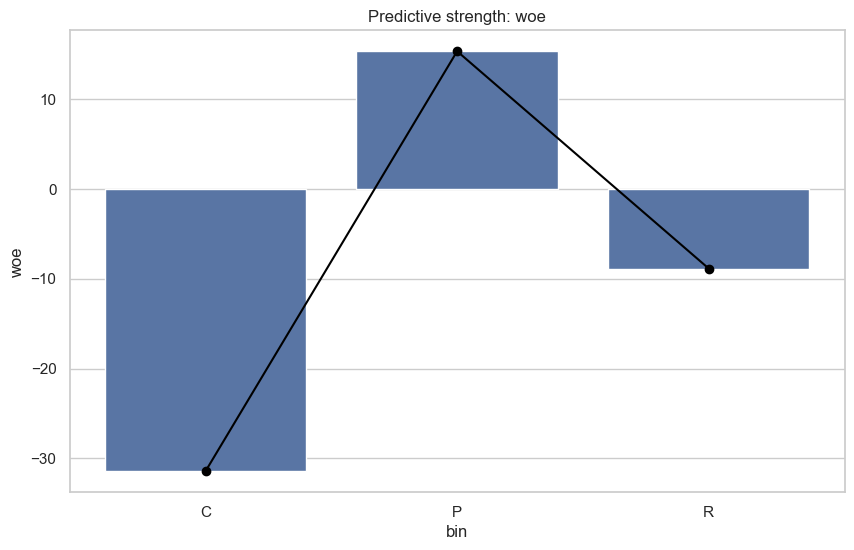

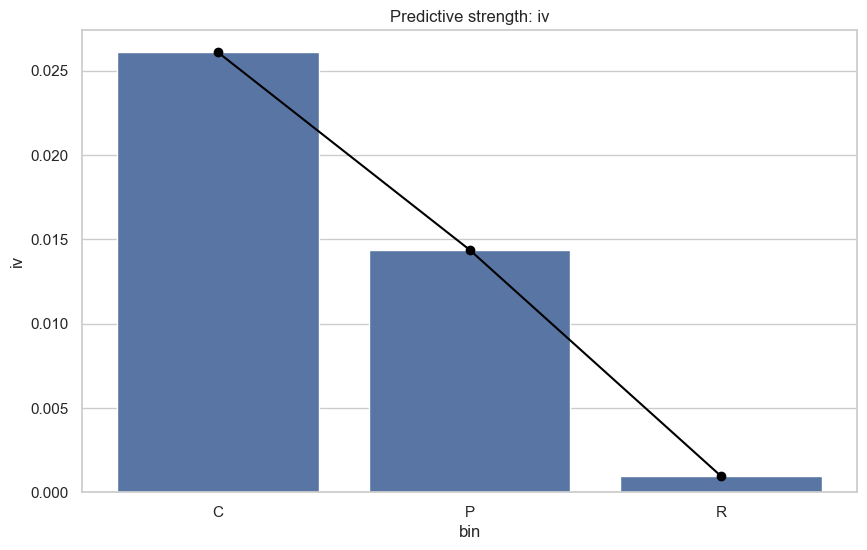

iv=np.float64(0.04144255684965906)
           woe        iv
bin                     
C   -31.439928  0.026102
P    15.343184  0.014388
R    -8.860894  0.000953


PROP_TYPE


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/4163444106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[col] =processed_df[col].fillna("Unknown")


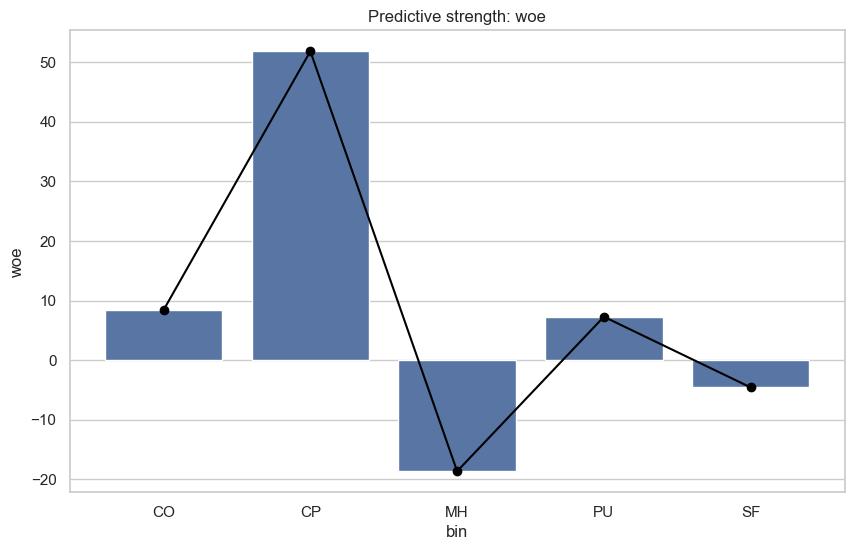

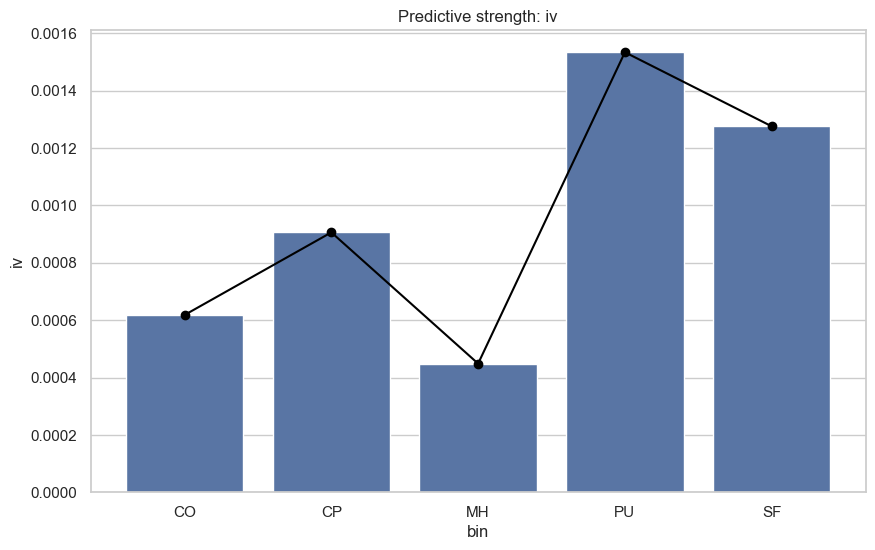

iv=np.float64(0.004781691372095896)
           woe        iv
bin                     
CO    8.401227  0.000618
CP   51.838552  0.000906
MH  -18.659183  0.000448
PU    7.270536  0.001534
SF   -4.589479  0.001276


OCC_STAT


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/4163444106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[col] =processed_df[col].fillna("Unknown")


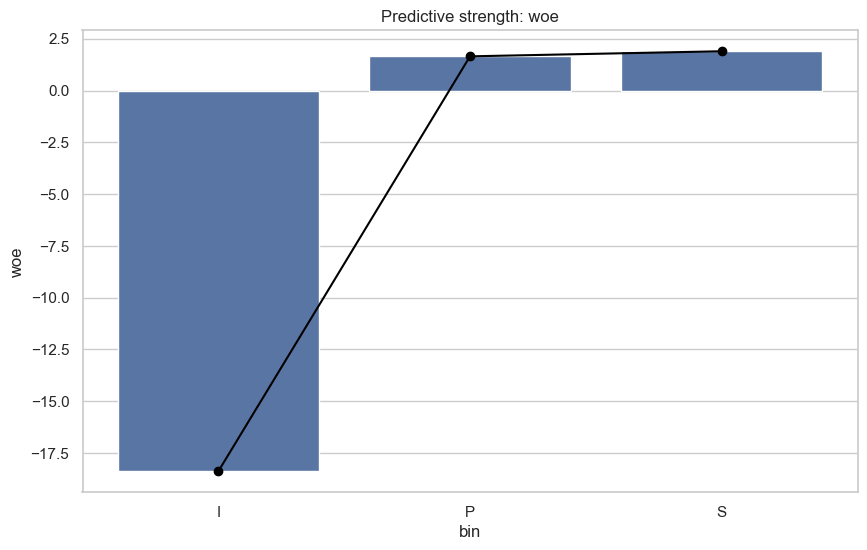

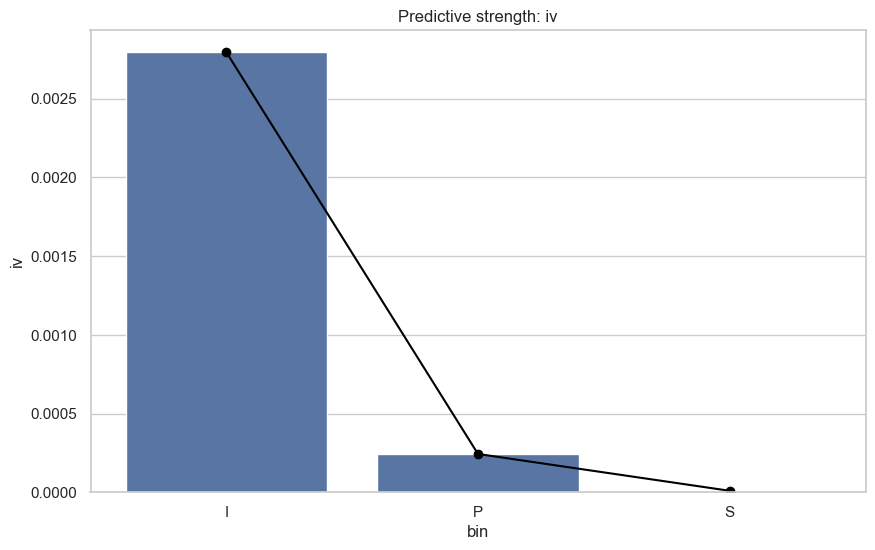

iv=np.float64(0.0030483211519819076)
           woe        iv
bin                     
I   -18.379926  0.002796
P     1.651907  0.000243
S     1.897776  0.000009


MI_TYPE


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/4163444106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[col] =processed_df[col].fillna("Unknown")


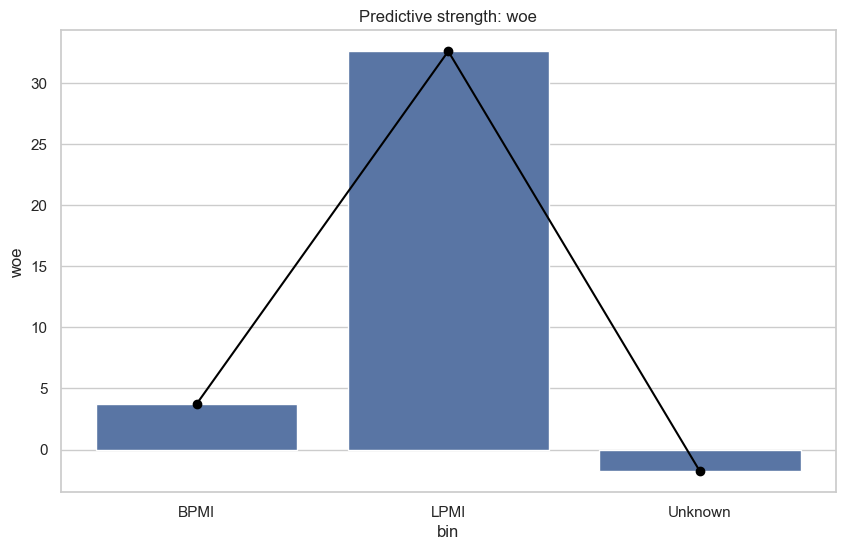

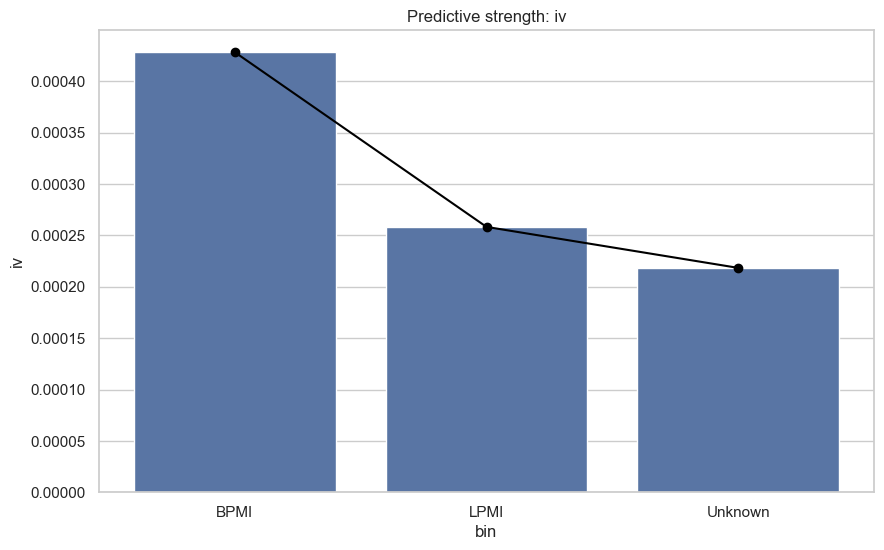

iv=np.float64(0.0009050699129748309)
               woe        iv
bin                         
BPMI      3.730524  0.000428
LPMI     32.609358  0.000258
Unknown  -1.779556  0.000218


FTHB_FLAG


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/4163444106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[col] =processed_df[col].fillna("Unknown")


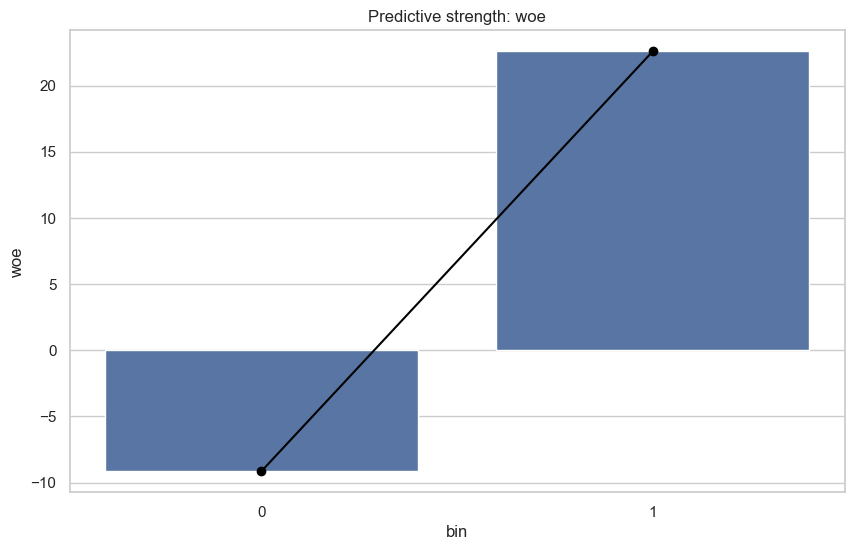

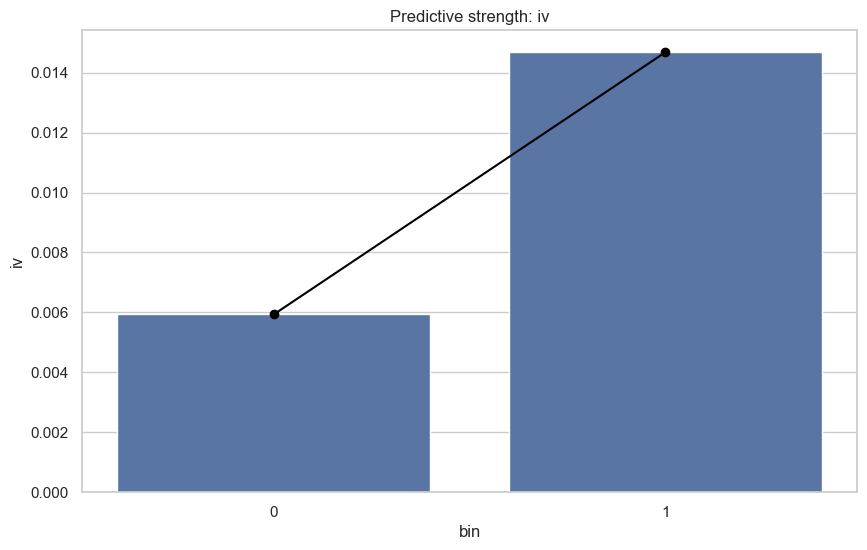

iv=np.float64(0.020617428047370073)
           woe        iv
bin                     
0    -9.138629  0.005937
1    22.599548  0.014681




In [7]:
for col in CAT_COLUMNS:
    processed_df[col] =processed_df[col].fillna("Unknown")
    print(col)
    results, iv = get_measures(
        orig_data=processed_df,
        grouped_data=processed_df.groupby(col)
    )
    print(f'{iv=}')
    print(results)
    print("===========================\n\n")

## Numerical variables

In [8]:
NUMERICAL_COLUMNS = [
    "ORIG_RATE",
    "ORIG_AMOUNT",	
    "ORIG_TERM",
    "OLTV",
    "NUM_BO", 
    "DTI",
    "CSCORE_B", 
    "CSCORE_C",
    "NUM_UNIT"]


### Experimental Implementation

ORIG_RATE


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/2876108159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=num_df.groupby('bins')


Bin either does not contain any 'bad' or 'good' observations.


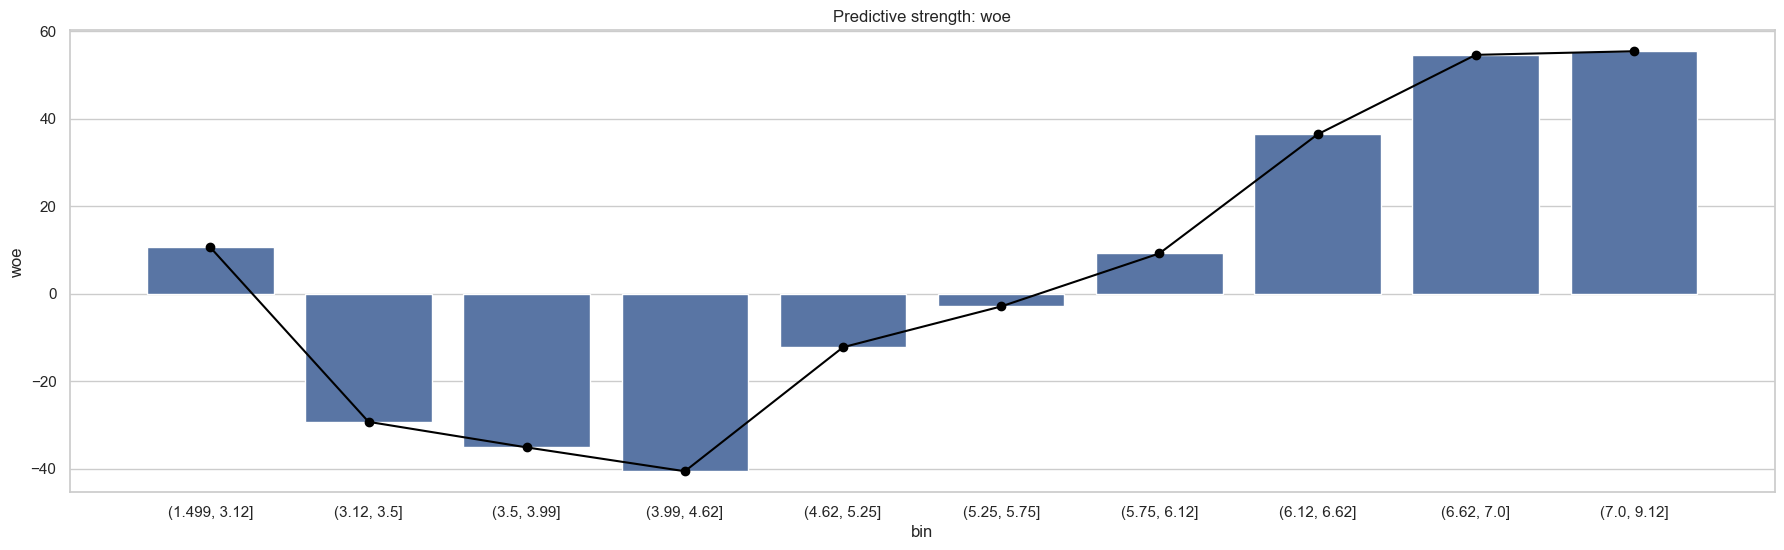

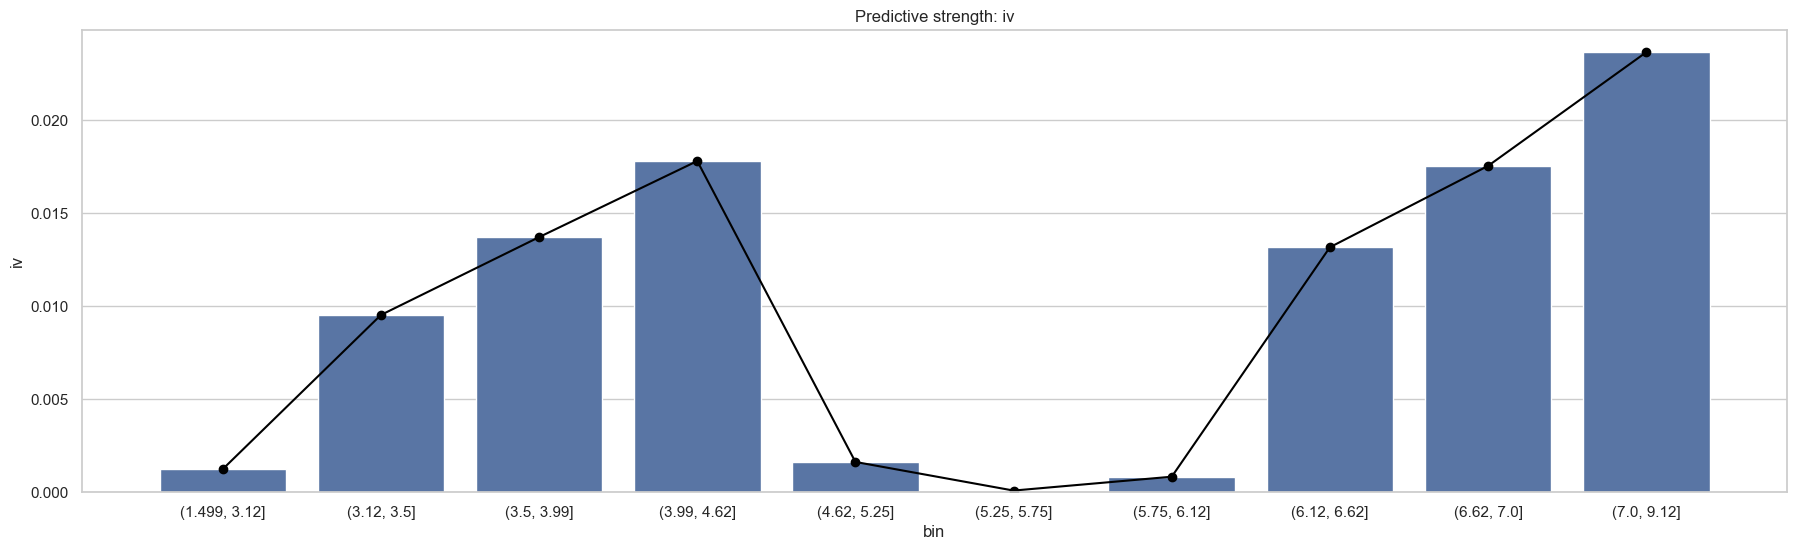

iv=np.float64(0.0992558310550039)
                     woe        iv
bin                               
(1.499, 3.12]  10.560309  0.001243
(3.12, 3.5]   -29.283719  0.009534
(3.5, 3.99]   -35.125295  0.013720
(3.99, 4.62]  -40.572481  0.017813
(4.62, 5.25]  -12.234618  0.001630
(5.25, 5.75]   -2.912422  0.000090
(5.75, 6.12]    9.197084  0.000836
(6.12, 6.62]   36.396890  0.013176
(6.62, 7.0]    54.567266  0.017551
(7.0, 9.12]    55.391191  0.023663
Unknown              NaN       NaN


ORIG_AMOUNT


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/2876108159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=num_df.groupby('bins')


Bin either does not contain any 'bad' or 'good' observations.


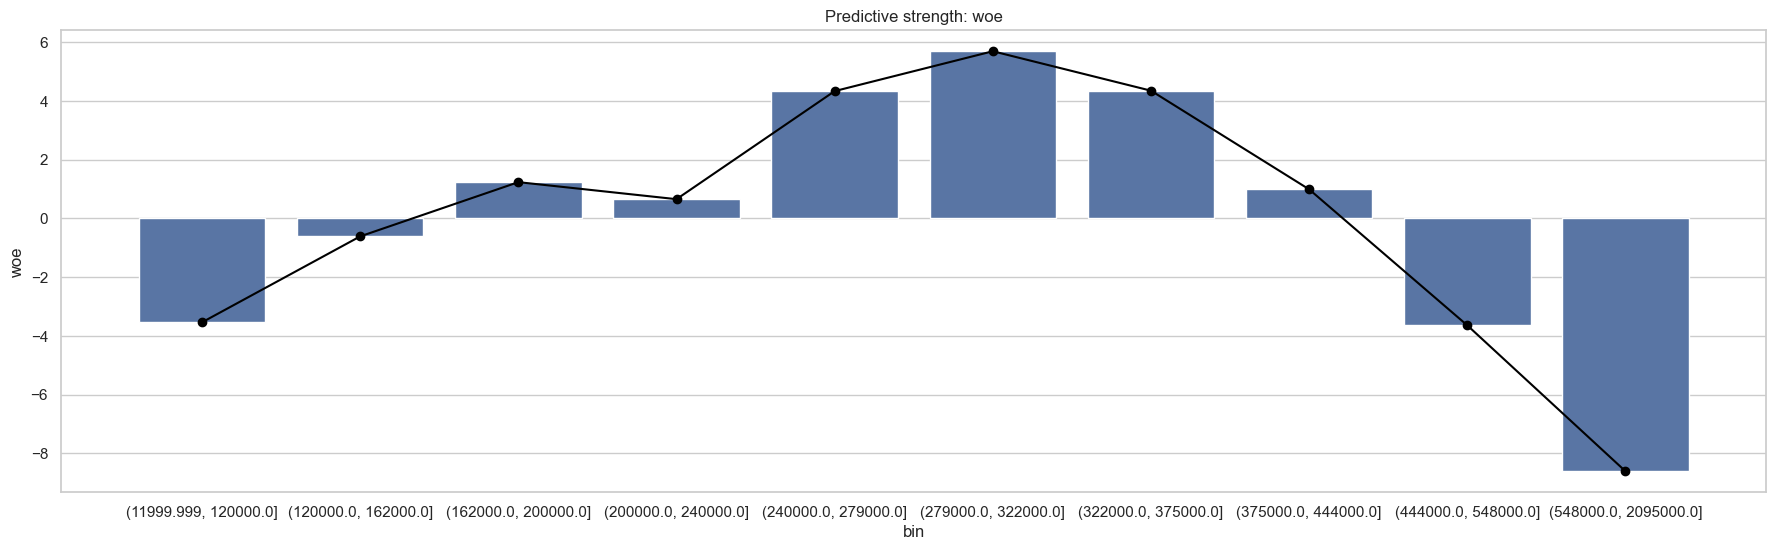

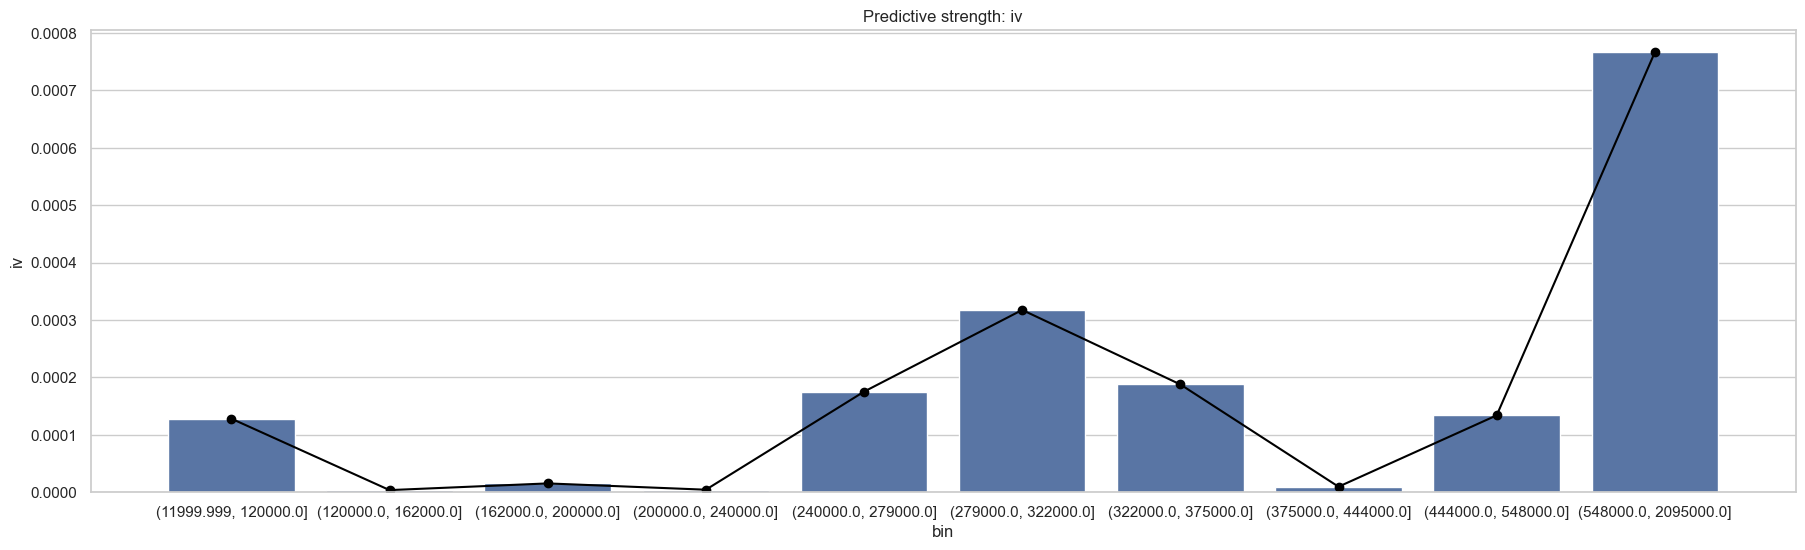

iv=np.float64(0.0017426887111467461)
                            woe        iv
bin                                      
(11999.999, 120000.0] -3.534829  0.000128
(120000.0, 162000.0]  -0.609500  0.000004
(162000.0, 200000.0]   1.236957  0.000015
(200000.0, 240000.0]   0.657085  0.000004
(240000.0, 279000.0]   4.336024  0.000175
(279000.0, 322000.0]   5.693121  0.000318
(322000.0, 375000.0]   4.350229  0.000188
(375000.0, 444000.0]   0.991274  0.000010
(444000.0, 548000.0]  -3.638967  0.000134
(548000.0, 2095000.0] -8.605239  0.000767
Unknown                     NaN       NaN


ORIG_TERM


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/2876108159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=num_df.groupby('bins')


Bin either does not contain any 'bad' or 'good' observations.


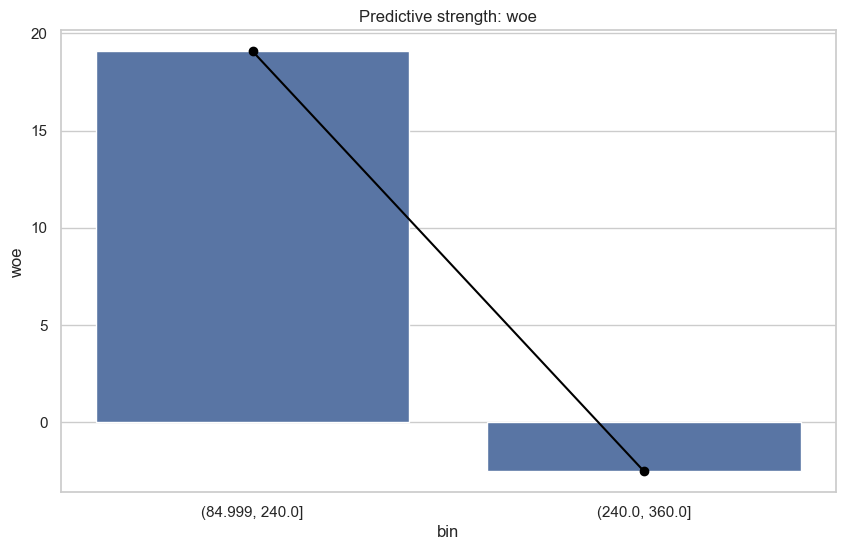

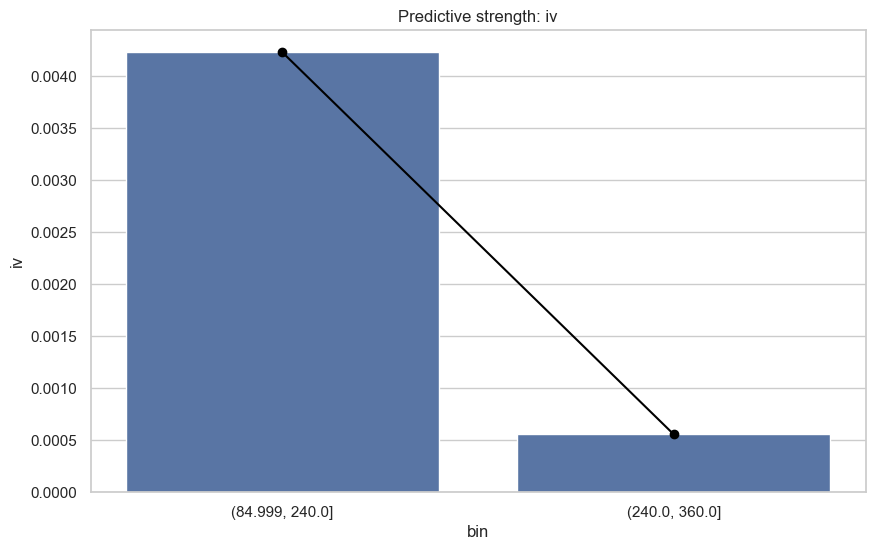

iv=np.float64(0.00478562473326898)
                       woe        iv
bin                                 
(84.999, 240.0]  19.073322  0.004229
(240.0, 360.0]   -2.510068  0.000557
Unknown                NaN       NaN


OLTV


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/2876108159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=num_df.groupby('bins')


Bin either does not contain any 'bad' or 'good' observations.


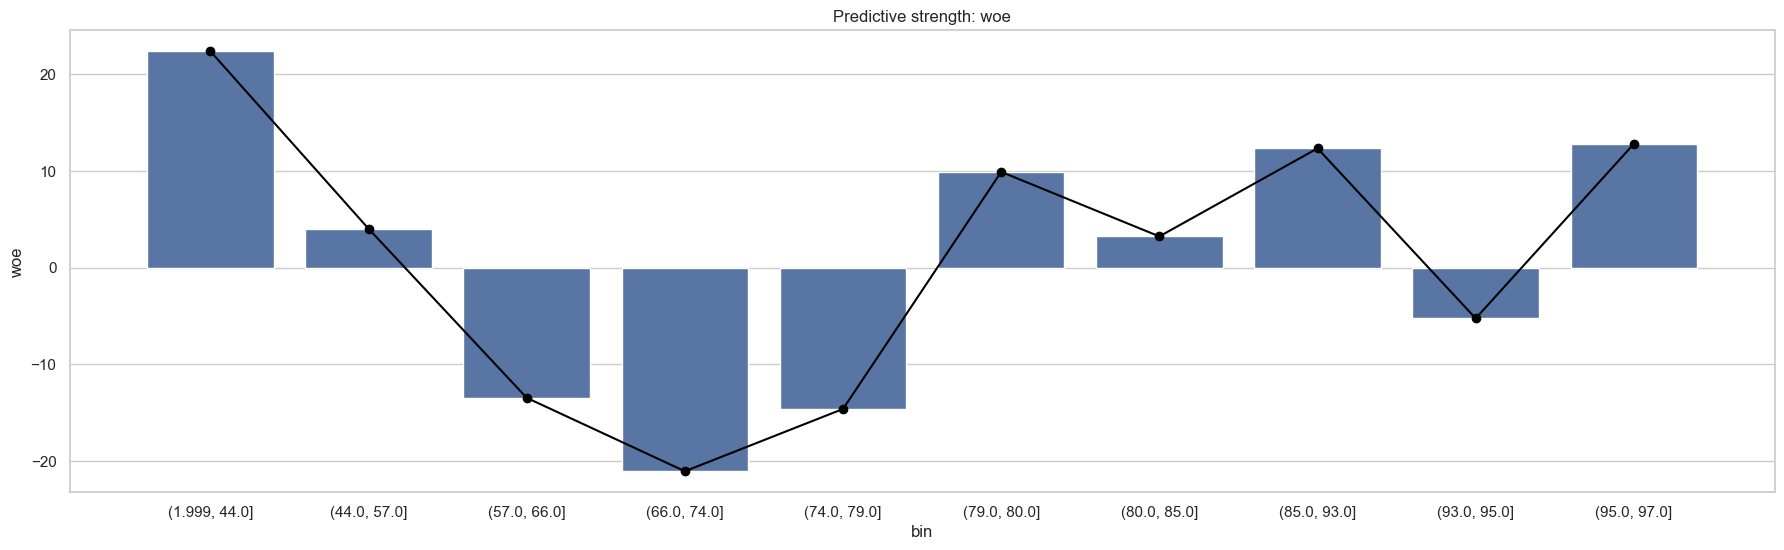

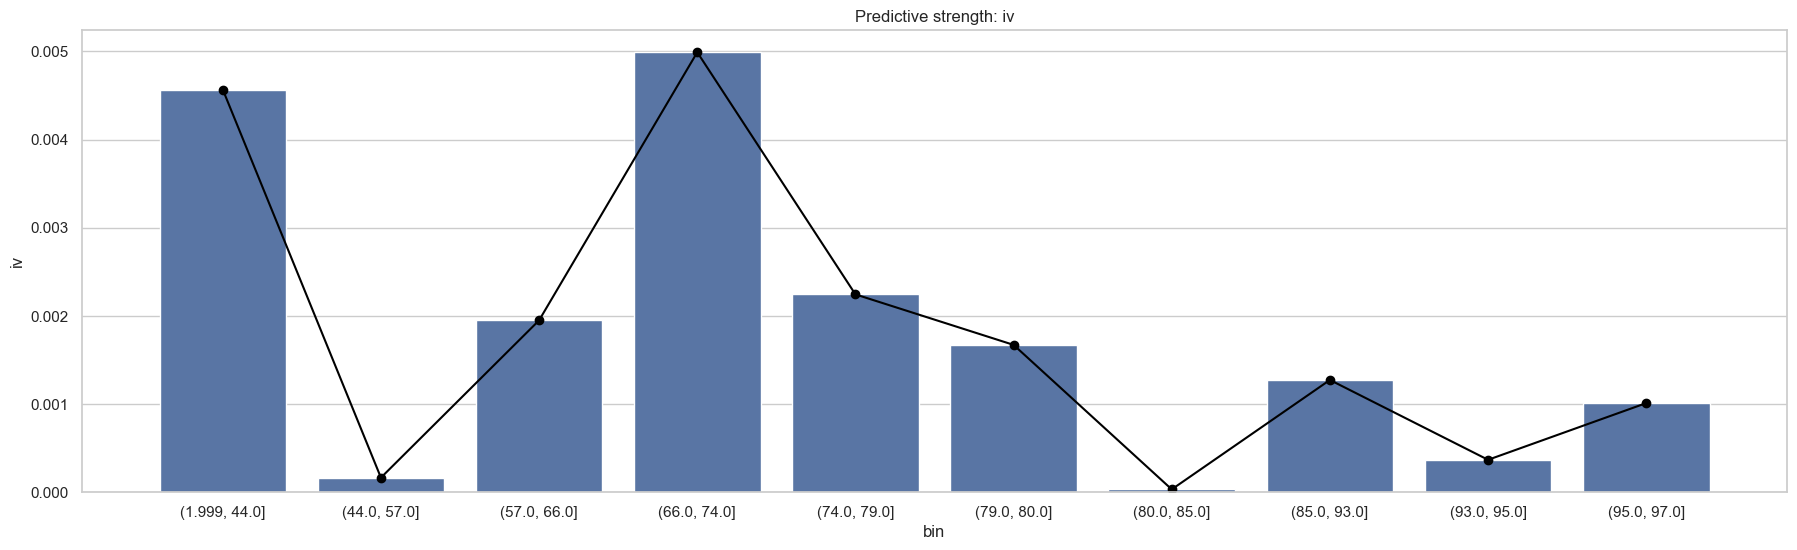

iv=np.float64(0.01827089444330657)
                     woe        iv
bin                               
(1.999, 44.0]  22.392403  0.004567
(44.0, 57.0]    4.032471  0.000165
(57.0, 66.0]  -13.457877  0.001949
(66.0, 74.0]  -21.052773  0.004989
(74.0, 79.0]  -14.608322  0.002244
(79.0, 80.0]    9.913852  0.001671
(80.0, 85.0]    3.238610  0.000033
(85.0, 93.0]   12.345179  0.001273
(93.0, 95.0]   -5.239807  0.000368
(95.0, 97.0]   12.812273  0.001011
Unknown              NaN       NaN


NUM_BO


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/2876108159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=num_df.groupby('bins')


Bin either does not contain any 'bad' or 'good' observations.


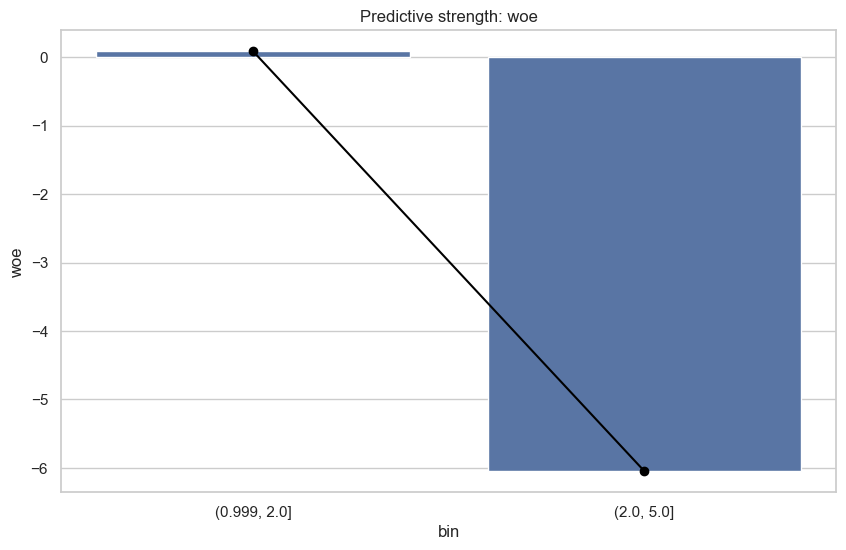

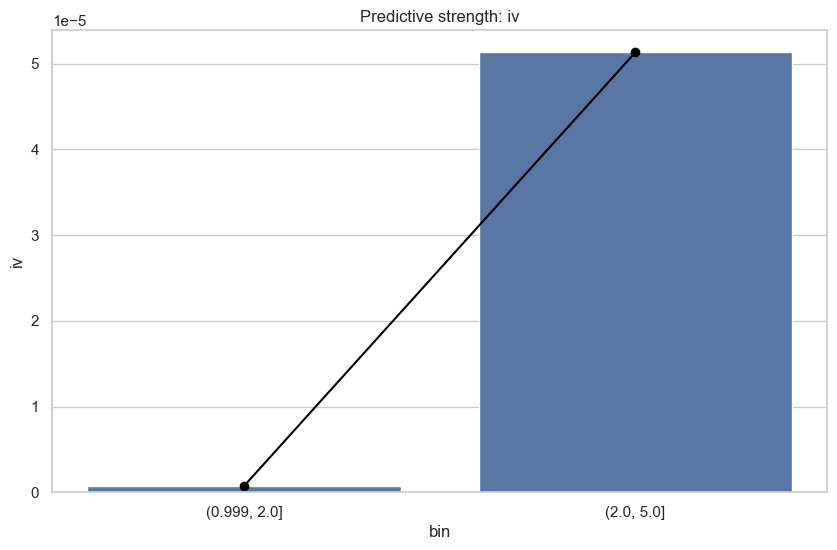

iv=np.float64(5.206017420416716e-05)
                   woe            iv
bin                                 
(0.999, 2.0]  0.086069  7.303840e-07
(2.0, 5.0]   -6.048712  5.132979e-05
Unknown            NaN           NaN


DTI


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/2876108159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=num_df.groupby('bins')


Bin either does not contain any 'bad' or 'good' observations.


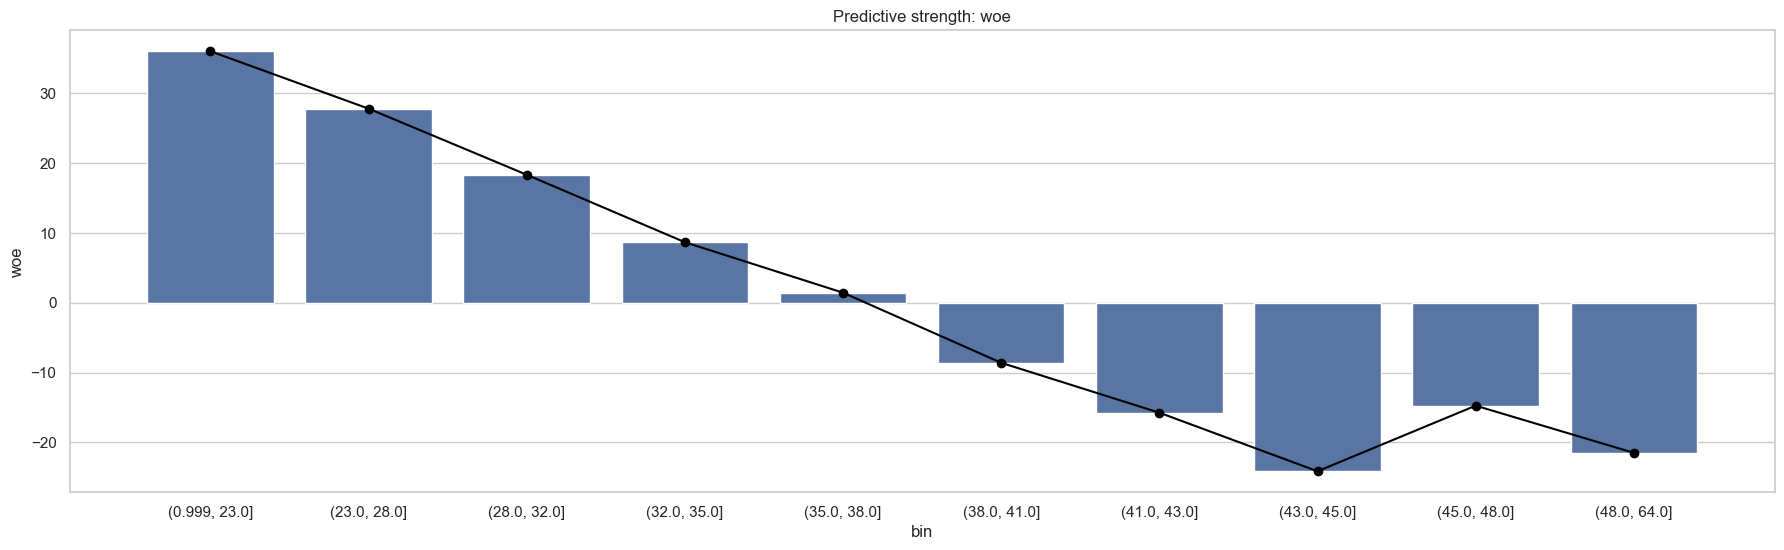

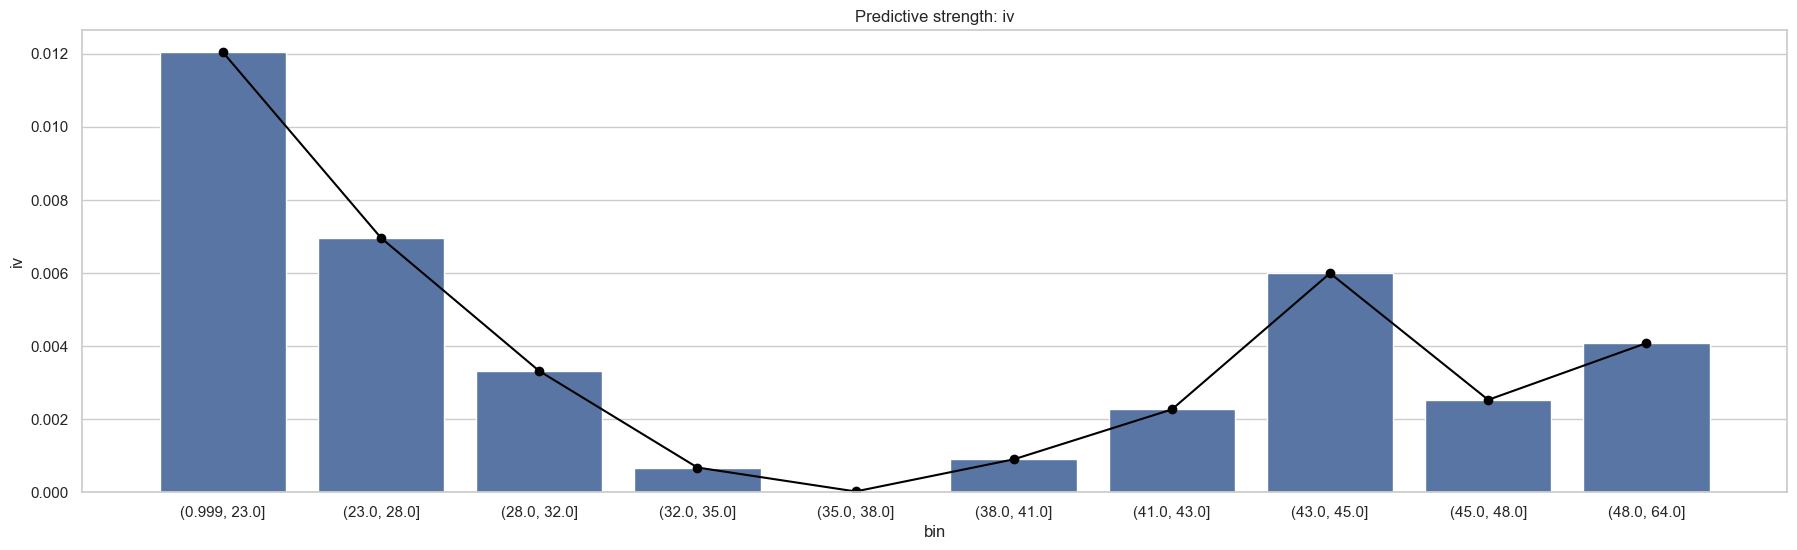

iv=np.float64(0.03878235035262752)
                     woe        iv
bin                               
(0.999, 23.0]  36.022115  0.012040
(23.0, 28.0]   27.802053  0.006959
(28.0, 32.0]   18.336965  0.003318
(32.0, 35.0]    8.674707  0.000677
(35.0, 38.0]    1.444440  0.000022
(38.0, 41.0]   -8.595301  0.000900
(41.0, 43.0]  -15.741251  0.002266
(43.0, 45.0]  -24.126644  0.005993
(45.0, 48.0]  -14.733902  0.002529
(48.0, 64.0]  -21.490061  0.004080
Unknown              NaN       NaN


CSCORE_B


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/2876108159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=num_df.groupby('bins')


Bin either does not contain any 'bad' or 'good' observations.


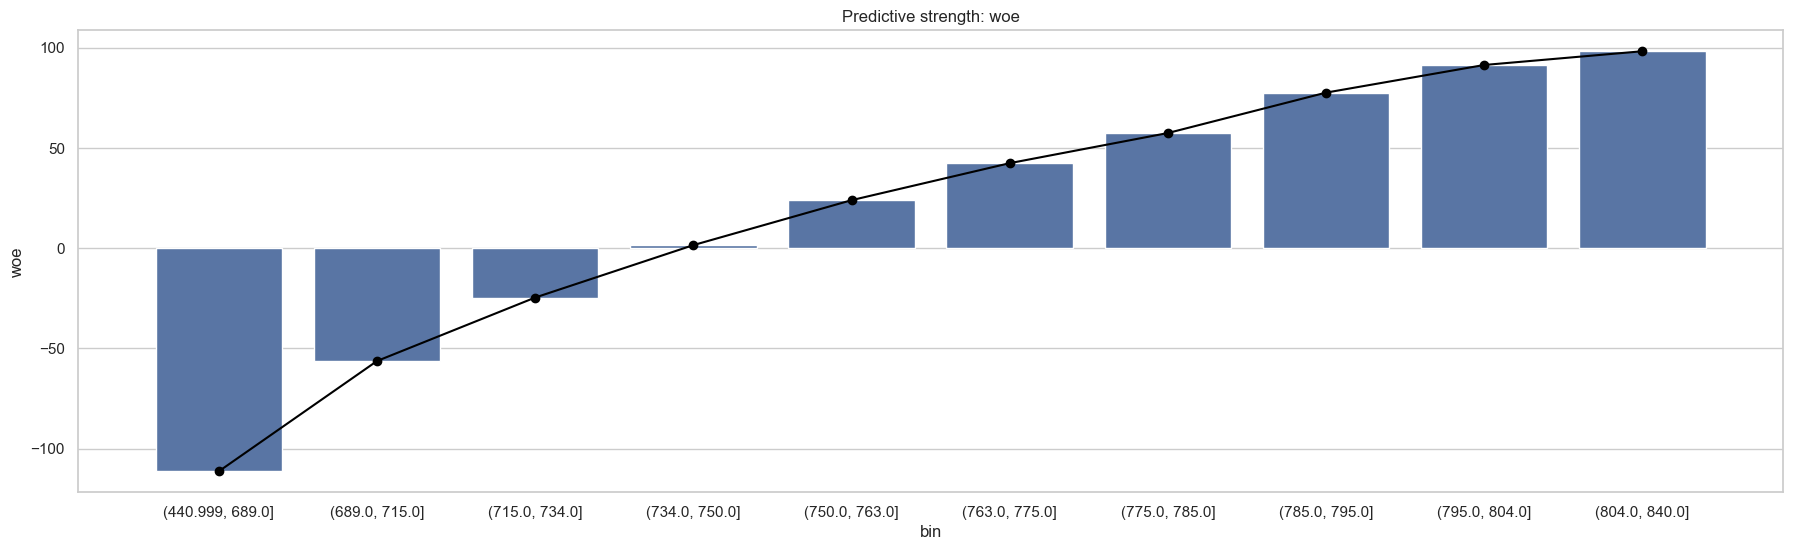

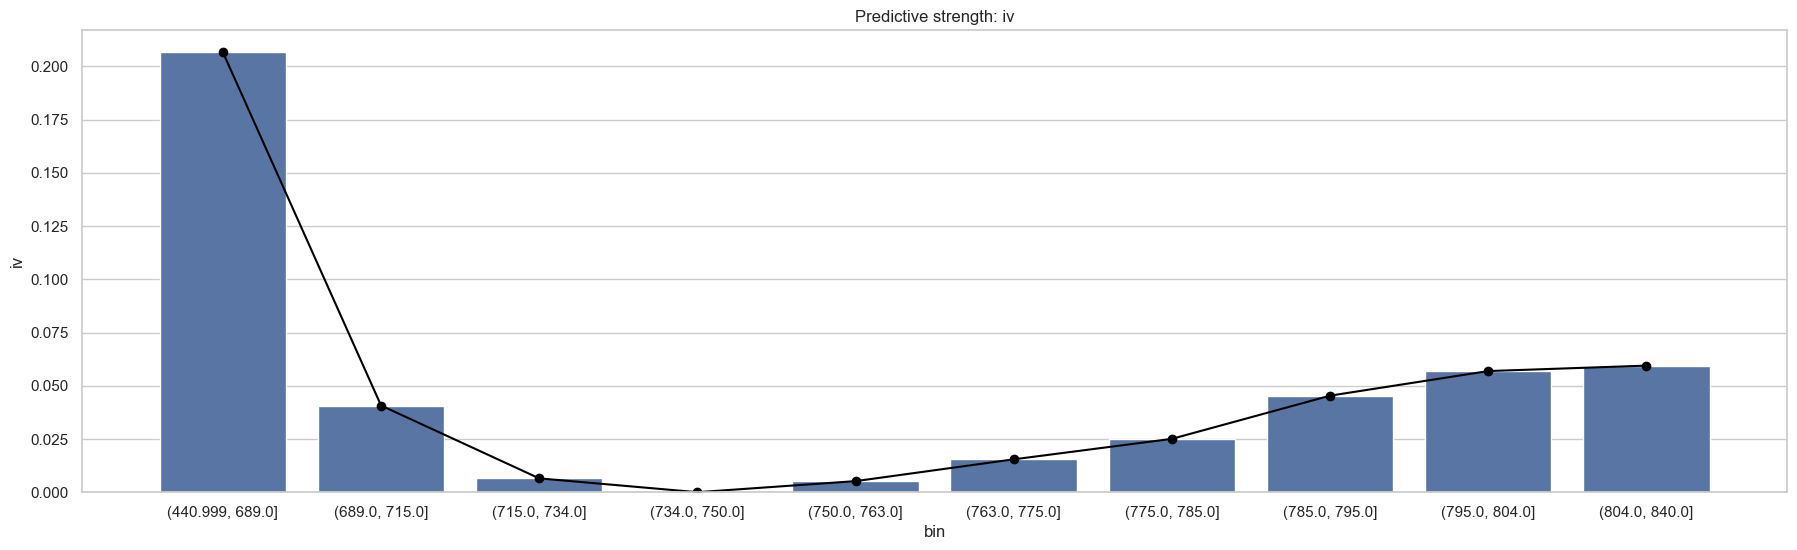

iv=np.float64(0.4613547064455368)
                         woe        iv
bin                                   
(440.999, 689.0] -111.262328  0.206613
(689.0, 715.0]    -56.256947  0.040734
(715.0, 734.0]    -24.599799  0.006521
(734.0, 750.0]      1.545543  0.000024
(750.0, 763.0]     23.958592  0.005219
(763.0, 775.0]     42.426400  0.015456
(775.0, 785.0]     57.459791  0.025072
(785.0, 795.0]     77.615971  0.045356
(795.0, 804.0]     91.404113  0.056904
(804.0, 840.0]     98.254938  0.059456
Unknown                  NaN       NaN


CSCORE_C


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/2876108159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=num_df.groupby('bins')


Bin either does not contain any 'bad' or 'good' observations.


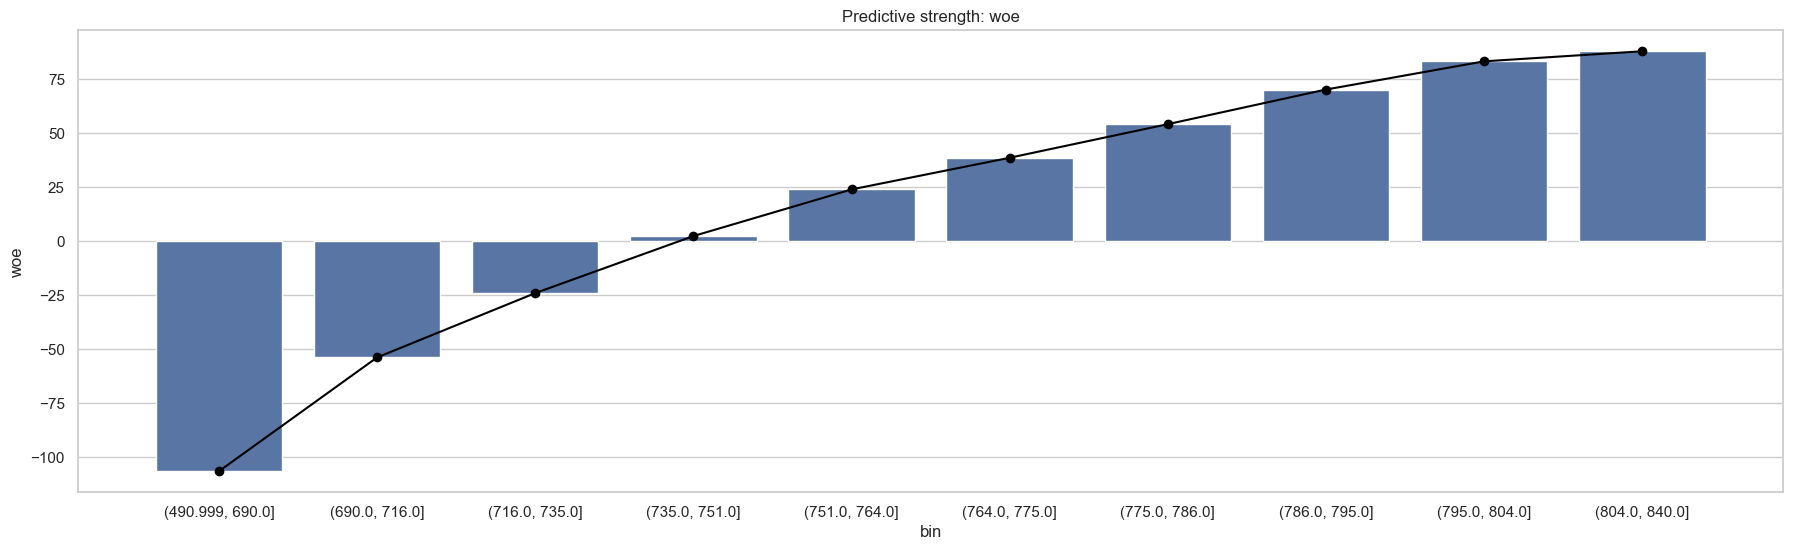

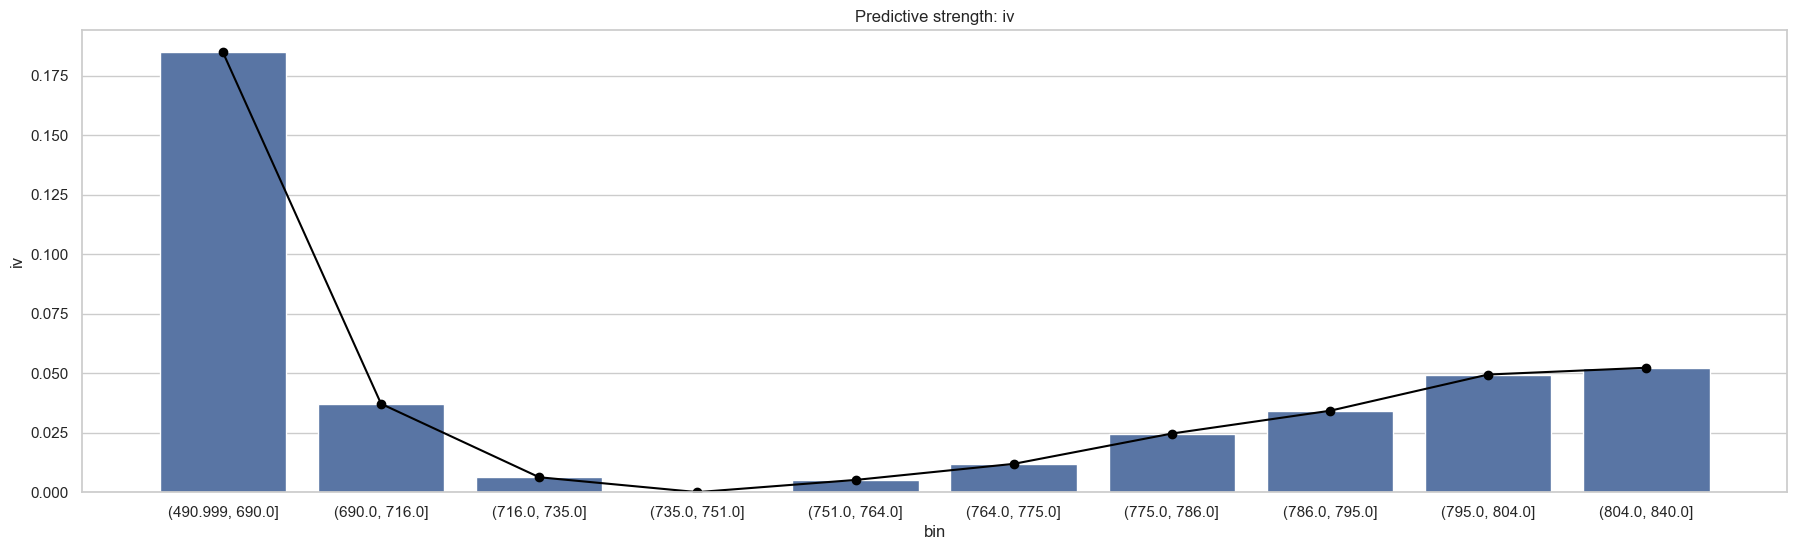

iv=np.float64(0.4060628319636569)
                         woe        iv
bin                                   
(490.999, 690.0] -106.550209  0.184816
(690.0, 716.0]    -53.892926  0.037160
(716.0, 735.0]    -24.120964  0.006297
(735.0, 751.0]      2.271590  0.000053
(751.0, 764.0]     23.849983  0.005172
(764.0, 775.0]     38.509348  0.011925
(775.0, 786.0]     54.062514  0.024659
(786.0, 795.0]     70.077421  0.034234
(795.0, 804.0]     83.121542  0.049448
(804.0, 840.0]     87.788369  0.052298
Unknown                  NaN       NaN


NUM_UNIT


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/2876108159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=num_df.groupby('bins')


Bin either does not contain any 'bad' or 'good' observations.


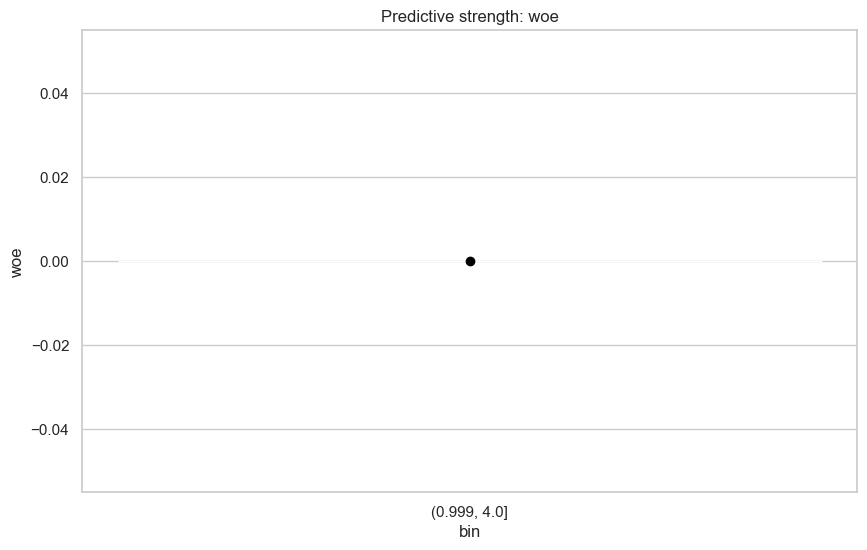

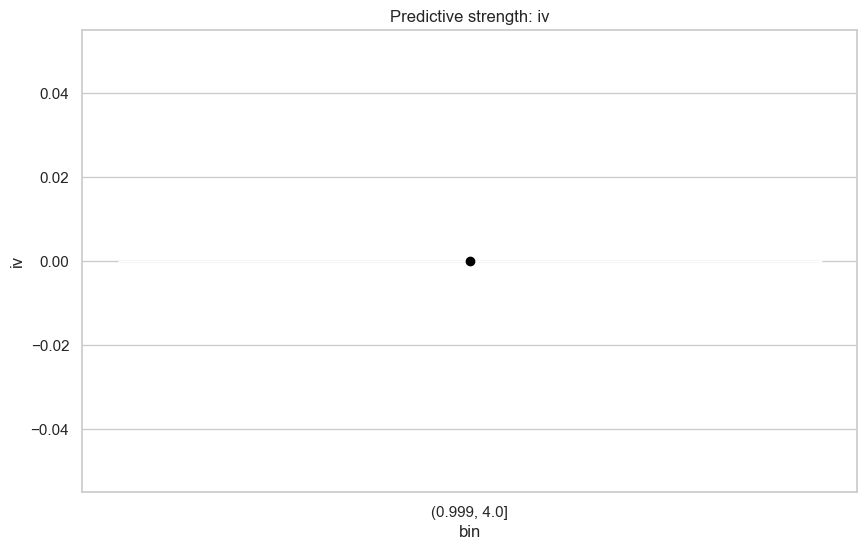

iv=np.float64(0.0)
              woe   iv
bin                   
(0.999, 4.0]  0.0  0.0
Unknown       NaN  NaN




In [9]:

for col in NUMERICAL_COLUMNS:
    num_df = processed_df.copy()
    num_df['bins'] = pd.qcut(num_df[col], q=10, duplicates="drop")

    num_df['bins'] = num_df['bins'].cat.add_categories(['Unknown'])
    num_df.loc[num_df[col].isna(), 'bins'] = 'Unknown'
    

    print(col)
    results, iv = get_measures(
        orig_data=num_df,
        grouped_data=num_df.groupby('bins')
    )
    print(f'{iv=}')
    print(results)
    print("===========================\n\n")


## `optbinning` Library

COLUMN: PURPOSE
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[P],1840045,0.653080,1735187,104858,0.056987,0.153432,0.014388,0.001797
1,[R],328876,0.116727,305369,23507,0.071477,-0.088609,0.000953,0.000119
2,[C],648565,0.230193,591498,57067,0.087990,-0.314399,0.026102,0.003249
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,2817486,1.000000,2632054,185432,0.065815,,0.041443,0.005165


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.10098905
    IV (Jeffrey)             0.04144256
    JS (Jensen-Shannon)      0.00516515
    Hellinger                0.00517272
    Triangular               0.02060043
    KS                       0.09377252
    HHI                      0.49312792
    HHI (normalized)         0.36640991
    Cramer's V               0.05224675
    Quality score            0.10879580

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic       p-value      P[A > B]  P[B > A]
        0      1  1052.093286 8.537818e-231  0.000000e+00       1.0
        1      2   786.678717 4.249895e-173 1.472698e-236       1.0

None


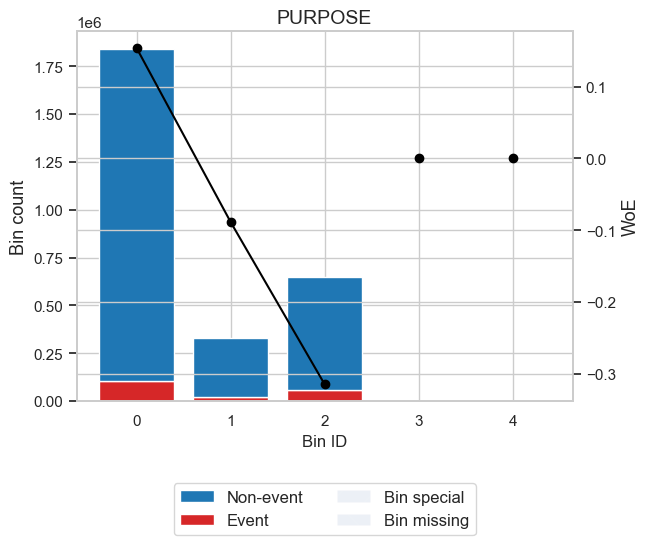


COLUMN: PROP_TYPE
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[CP, CO]",267658,0.094999,251619,16039,0.059923,0.100061,0.000911,0.000114
1,[PU],843694,0.299449,791821,51873,0.061483,0.072705,0.001534,0.000192
2,"[SF, MH]",1706134,0.605552,1588614,117520,0.068881,-0.048823,0.001474,0.000184
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,2817486,1.000000,2632054,185432,0.065815,,0.003919,0.000490


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.03092061
    IV (Jeffrey)             0.00391904
    JS (Jensen-Shannon)      0.00048977
    Hellinger                0.00048983
    Triangular               0.00195865
    KS                       0.03019896
    HHI                      0.46538773
    HHI (normalized)         0.33173466
    Cramer's V               0.01541427
    Quality score            0.01087416

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic       p-value      P[A > B]  P[B > A]
        0      1     8.615670  3.332832e-03  1.567867e-03  0.998432
        1      2   498.136617 2.417722e-110 6.279520e-146  1.000000

None


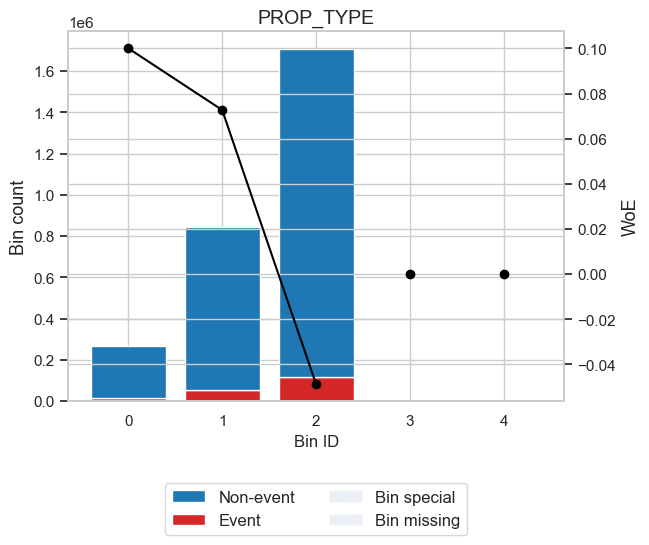


COLUMN: OCC_STAT
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[S, P]",2602261,0.923611,2433629,168632,0.064802,0.016588,0.000252,0.000032
1,[I],215225,0.076389,198425,16800,0.078058,-0.183799,0.002796,0.000349
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,2817486,1.000000,2632054,185432,0.065815,,0.003048,0.000381


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.01521136
    IV (Jeffrey)             0.00304817
    JS (Jensen-Shannon)      0.00038053
    Hellinger                0.00038078
    Triangular               0.00152016
    KS                       0.01521136
    HHI                      0.85889252
    HHI (normalized)         0.81185670
    Cramer's V               0.01419992
    Quality score            0.00238921

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic       p-value  P[A > B]  P[B > A]
        0      1   568.111616 1.445746e-125       0.0       1.0

None


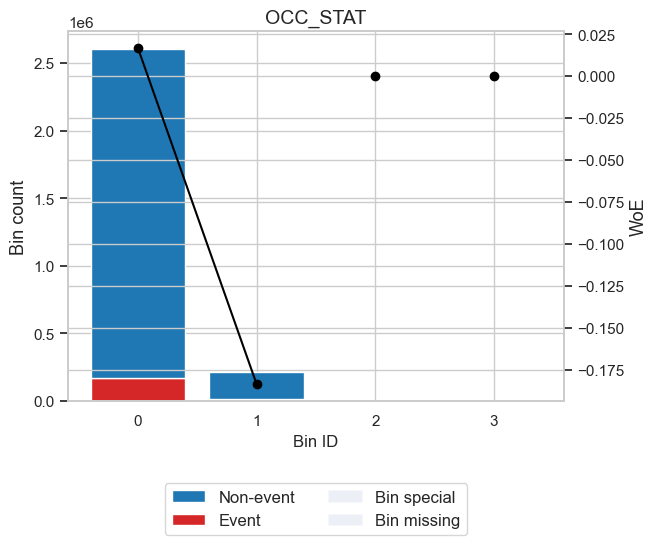


COLUMN: MI_TYPE
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[LPMI, BPMI]",889181,0.315594,832786,56395,0.063424,0.039565,0.000486,0.000061
1,[Unknown],1928305,0.684406,1799268,129037,0.066917,-0.017796,0.000218,0.000027
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,2817486,1.000000,2632054,185432,0.065815,,0.000704,0.000088


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.01227390
    IV (Jeffrey)             0.00070403
    JS (Jensen-Shannon)      0.00008800
    Hellinger                0.00008800
    Triangular               0.00035198
    KS                       0.01227390
    HHI                      0.56801132
    HHI (normalized)         0.42401510
    Cramer's V               0.00654847
    Quality score            0.00168944

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1   120.820555 4.183084e-28 3.481884e-33       1.0

None


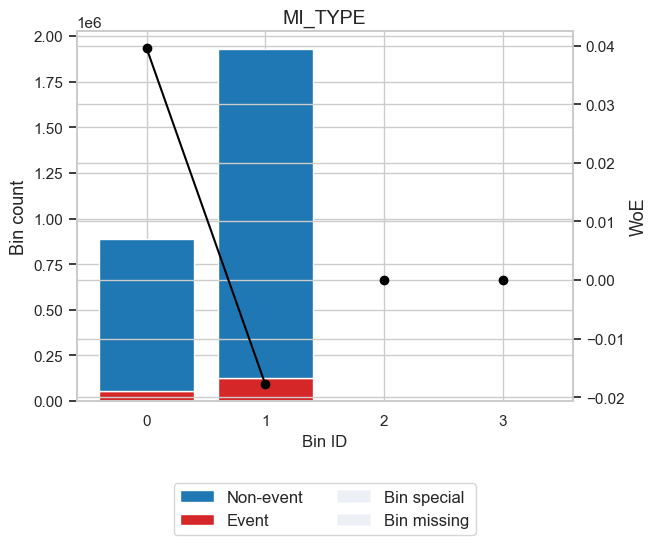


COLUMN: FTHB_FLAG
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],892780,0.316871,845275,47505,0.053210,0.225995,0.014681,0.001831
1,[0],1924706,0.683129,1786779,137927,0.071661,-0.091386,0.005937,0.000742
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,2817486,1.000000,2632054,185432,0.065815,,0.020617,0.002573


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.06496097
    IV (Jeffrey)             0.02061743
    JS (Jensen-Shannon)      0.00257303
    Hellinger                0.00257510
    Triangular               0.01027557
    KS                       0.06496097
    HHI                      0.56707236
    HHI (normalized)         0.42276315
    Cramer's V               0.03462086
    Quality score            0.04951511

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1  3377.049323      0.0       0.0       1.0

None


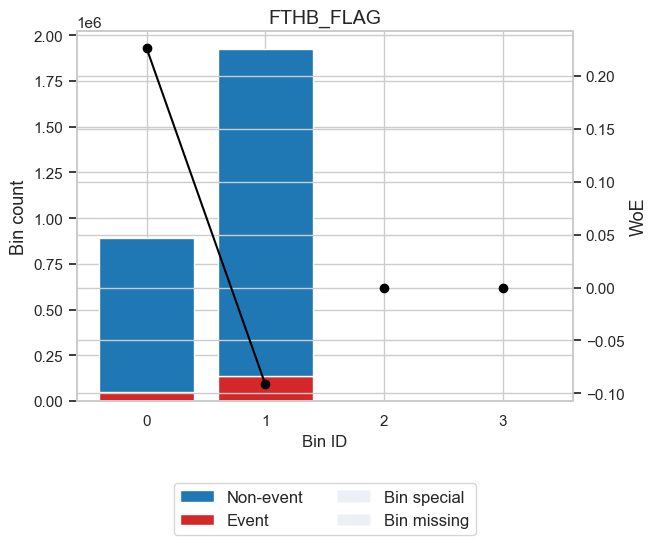

In [10]:
opt_bin_data = processed_df.copy()

for col in CAT_COLUMNS:
    print("====================================================================================================")
    print("COLUMN:", col)
    print("====================================================================================================")
    optb = OptimalBinning(name=col, dtype="categorical", solver="cp")
    optb.fit(processed_df[col], processed_df["DLQ_FLAG"])
    print(optb.status)
    display(optb.binning_table.build())
    print(optb.binning_table.analysis())
    optb.binning_table.plot(metric="woe")
    opt_bin_data[col] = optb.transform(opt_bin_data[col], metric="woe")
    print()


COLUMN: ORIG_RATE


OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.18)",329775,0.117046,310114,19661,0.059619,0.105471,0.001244,0.000155
1,"[3.18, 3.50)",208968,0.074168,191406,17562,0.084042,-0.264172,0.005808,0.000724
2,"[3.50, 3.84)",206753,0.073382,188097,18656,0.090233,-0.342042,0.009969,0.001240
3,"[3.84, 4.11)",158344,0.056200,143568,14776,0.093316,-0.379027,0.009528,0.001184
4,"[4.11, 4.60)",193133,0.068548,174413,18720,0.096928,-0.420998,0.014604,0.001812
5,"[4.60, 4.88)",142891,0.050716,130980,11911,0.083357,-0.255249,0.003694,0.000460
6,"[4.88, 5.68)",416220,0.147727,387556,28664,0.068867,-0.048613,0.000357,0.000045
7,"[5.68, 5.88)",151748,0.053859,142060,9688,0.063843,0.03253,0.000056,0.000007
8,"[5.88, 6.20)",198346,0.070398,186707,11639,0.058680,0.122347,0.000999,0.000125
9,"[6.20, 6.62)",326706,0.115957,311473,15233,0.046626,0.365017,0.013210,0.001642


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.17818799
    IV (Jeffrey)             0.10104959
    JS (Jensen-Shannon)      0.01252468
    Hellinger                0.01257760
    Triangular               0.04968339
    KS                       0.12096973
    HHI                      0.09305302
    HHI (normalized)         0.02328787
    Cramer's V               0.07748117
    Quality score            0.39733929

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic       p-value     P[A > B]     P[B > A]
        0      1  1186.169894 6.179900e-260 0.000000e+00 1.000000e+00
        1      2    50.097193  1.463162e-12 6.118573e-16 1.000000e+00
        2      3    10.242798  1.372193e-03 5.111500e-04 9.994889e-01
        3      4    13.167571  2.848357e-04 1.015344e-04 9.998985e-01
        4      5   182.56645

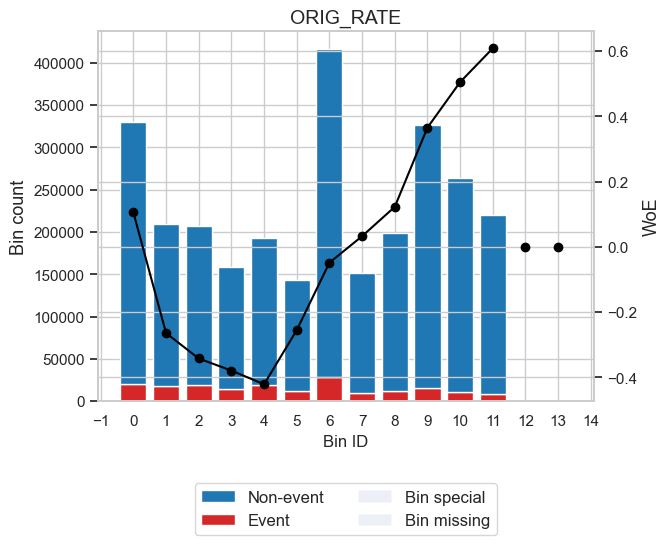


COLUMN: ORIG_AMOUNT
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 98500.00)",152913,0.054273,142438,10475,0.068503,-0.042916,1.018419e-04,1.272926e-05
1,"[98500.00, 124500.00)",150000,0.053239,139820,10180,0.067867,-0.032901,5.845864e-05,7.307000e-06
2,"[124500.00, 149500.00)",157616,0.055942,147175,10441,0.066243,-0.00695,2.709981e-06,3.387469e-07
3,"[149500.00, 199500.00)",359274,0.127516,335585,23689,0.065936,-0.001967,4.938412e-07,6.173014e-08
4,"[199500.00, 249500.00)",378700,0.134411,354183,24517,0.064740,0.017615,4.139030e-05,5.173721e-06
5,"[249500.00, 298500.00)",334518,0.118729,313473,21045,0.062911,0.048219,2.703380e-04,3.378898e-05
6,"[298500.00, 321500.00)",156088,0.055400,146535,9553,0.061203,0.077577,3.223898e-04,4.028862e-05
7,"[321500.00, 360500.00)",218755,0.077642,204988,13767,0.062933,0.047845,1.740872e-04,2.175882e-05
8,"[360500.00, 412500.00)",234392,0.083192,219412,14980,0.063910,0.031404,8.093300e-05,1.011621e-05
9,"[412500.00, 507500.00)",300373,0.106610,280350,20023,0.066660,-0.013674,2.005361e-05,2.506682e-06


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.02567112
    IV (Jeffrey)             0.00212690
    JS (Jensen-Shannon)      0.00026580
    Hellinger                0.00026583
    Triangular               0.00106298
    KS                       0.01353673
    HHI                      0.10241802
    HHI (normalized)         0.02761952
    Cramer's V               0.01149568
    Quality score            0.00097767

  Monotonic trend                valley

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1     0.482568 4.872615e-01 7.564389e-01  0.243561
        1      2     3.238644 7.192016e-02 9.643889e-01  0.035611
        2      3     0.168005 6.818910e-01 6.585857e-01  0.341414
        3      4     4.318276 3.770511e-02 9.815390e-01  0.018461
        4      5     9.930365 1.625743e-03 9.993

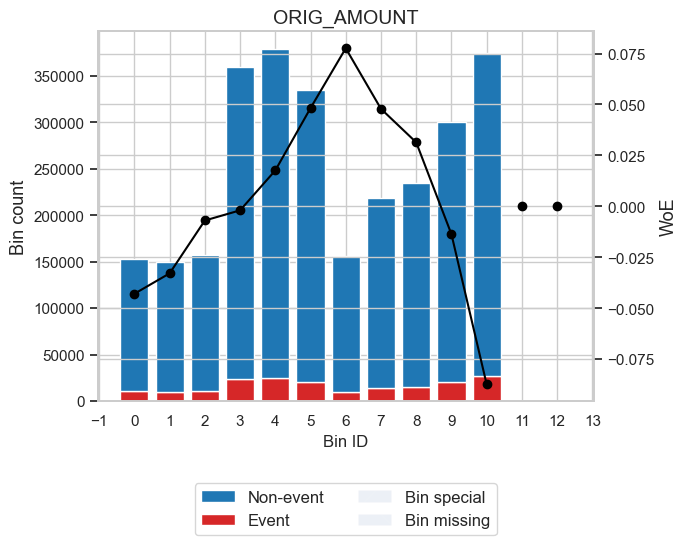


COLUMN: ORIG_TERM
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 260.50)",355946,0.126335,336373,19573,0.054989,0.191238,0.004254,0.000531
1,"[260.50, inf)",2461540,0.873665,2295681,165859,0.067380,-0.025185,0.000560,0.000070
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,2817486,1.000000,2632054,185432,0.065815,,0.004814,0.000601


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.02224515
    IV (Jeffrey)             0.00481436
    JS (Jensen-Shannon)      0.00060098
    Hellinger                0.00060139
    Triangular               0.00240071
    KS                       0.02224515
    HHI                      0.77925164
    HHI (normalized)         0.70566886
    Cramer's V               0.01660273
    Quality score            0.00590311

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic       p-value      P[A > B]  P[B > A]
        0      1   776.642167 6.464999e-171 5.481374e-193       1.0

None


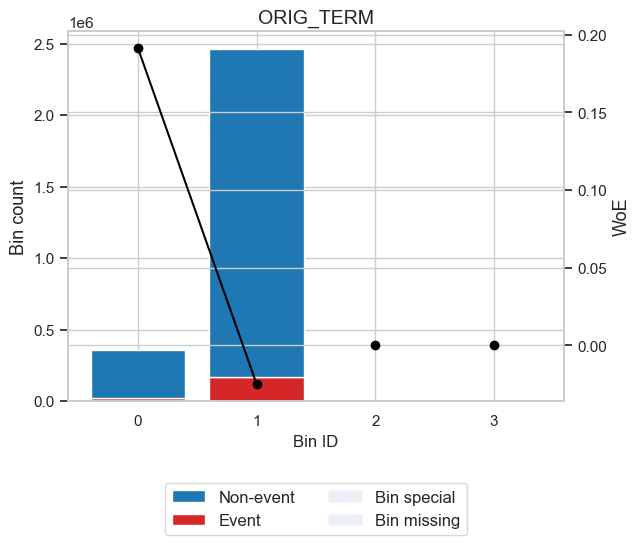


COLUMN: OLTV
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 35.50)",153821,0.054595,146153,7668,0.049850,0.294767,0.004179,5.204448e-04
1,"[35.50, 50.50)",255459,0.090669,240434,15025,0.058816,0.119899,0.001238,1.545979e-04
2,"[50.50, 58.50)",193344,0.068623,180530,12814,0.066276,-0.007473,0.000004,4.805832e-07
3,"[58.50, 67.50)",287316,0.101976,265648,21668,0.075415,-0.146496,0.002333,2.913295e-04
4,"[67.50, 70.50)",162146,0.057550,148086,14060,0.086712,-0.298372,0.005836,7.268417e-04
5,"[70.50, 79.50)",375448,0.133256,347698,27750,0.073912,-0.124733,0.002189,2.734428e-04
6,"[79.50, 95.50)",1206511,0.428223,1130770,75741,0.062777,0.050503,0.001069,1.335536e-04
7,"[95.50, inf)",183441,0.065108,172735,10706,0.058362,0.128123,0.001011,1.263067e-04
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.07071967
    IV (Jeffrey)             0.01785764
    JS (Jensen-Shannon)      0.00222700
    Hellinger                0.00222960
    Triangular               0.00888732
    KS                       0.02905004
    HHI                      0.23499258
    HHI (normalized)         0.14999175
    Cramer's V               0.03355010
    Quality score            0.06317477

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic       p-value     P[A > B]  P[B > A]
        0      1   147.357438  6.555322e-34 4.082022e-43       1.0
        1      2   105.264346  1.068821e-24 2.675595e-38       1.0
        2      3   144.970380  2.179900e-33 1.651058e-43       1.0
        3      4   180.774183  3.283876e-41 1.434982e-79       1.0
        4      5   258.688073  3.315032e-58

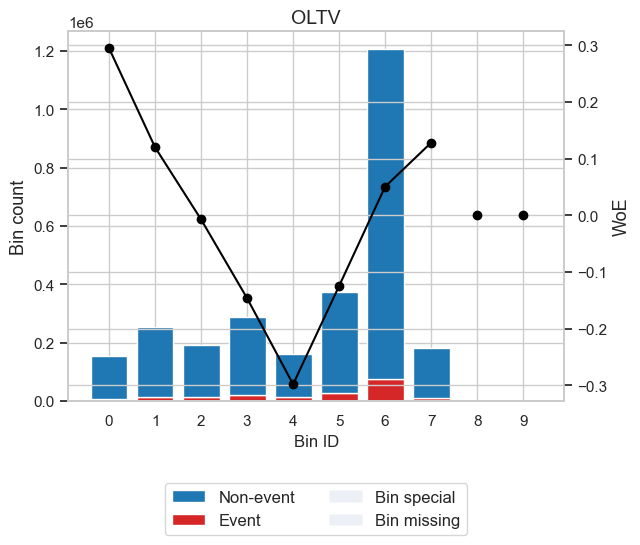


COLUMN: NUM_BO
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",1562419,0.554544,1442497,119922,0.076754,-0.165542,0.016334,0.002039
1,"[1.50, inf)",1255067,0.445456,1189557,65510,0.052196,0.246302,0.024302,0.003030
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,2817486,1.000000,2632054,185432,0.065815,,0.040635,0.005069


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.09866693
    IV (Jeffrey)             0.04063539
    JS (Jensen-Shannon)      0.00506944
    Hellinger                0.00507443
    Triangular               0.02023804
    KS                       0.09866693
    HHI                      0.50595002
    HHI (normalized)         0.34126670
    Cramer's V               0.04922425
    Quality score            0.11093360

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1  6826.845129      0.0       1.0       0.0

None


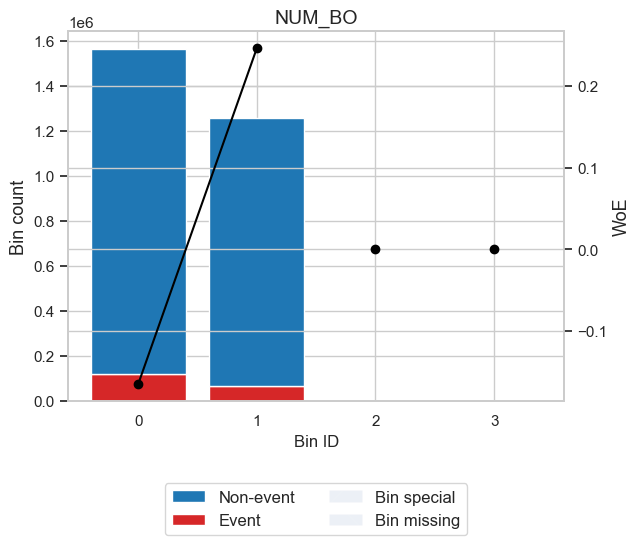


COLUMN: DTI
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 22.50)",260587,0.092489,248440,12147,0.046614,0.365288,1.055084e-02,1.311572e-03
1,"[22.50, 25.50)",145943,0.051799,138911,7032,0.048183,0.330531,4.909834e-03,6.109506e-04
2,"[25.50, 29.50)",254427,0.090303,241108,13319,0.052349,0.243222,4.810352e-03,5.998163e-04
3,"[29.50, 31.50)",150525,0.053425,142096,8429,0.055997,0.171993,1.467225e-03,1.831774e-04
4,"[31.50, 33.50)",164321,0.058322,154861,9460,0.057570,0.142624,1.115398e-03,1.393068e-04
5,"[33.50, 36.50)",274648,0.097480,257588,17060,0.062116,0.061793,3.623802e-04,4.529031e-05
6,"[36.50, 38.50)",200220,0.071063,187064,13156,0.065708,0.001741,2.153114e-07,2.691392e-08
7,"[38.50, 40.50)",217070,0.077044,201901,15169,0.069881,-0.064308,3.276516e-04,4.094940e-05
8,"[40.50, 42.50)",231273,0.082085,214014,17259,0.074626,-0.135124,1.589585e-03,1.985471e-04
9,"[42.50, 48.50)",691832,0.245549,637636,54196,0.078337,-0.187671,9.385603e-03,1.171482e-03


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.10881707
    IV (Jeffrey)             0.03859901
    JS (Jensen-Shannon)      0.00481013
    Hellinger                0.00481748
    Triangular               0.01918211
    KS                       0.08585501
    HHI                      0.11963887
    HHI (normalized)         0.04627545
    Cramer's V               0.04773736
    Quality score            0.14024397

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1     5.124563 2.358951e-02 1.141035e-02  0.988590
        1      2    33.359201 7.661447e-09 7.325967e-10  1.000000
        2      3    24.769449 6.461352e-07 9.899419e-09  1.000000
        3      4     3.626795 5.685621e-02 2.800695e-02  0.971993
        4      5    37.423761 9.505695e-10 5.507

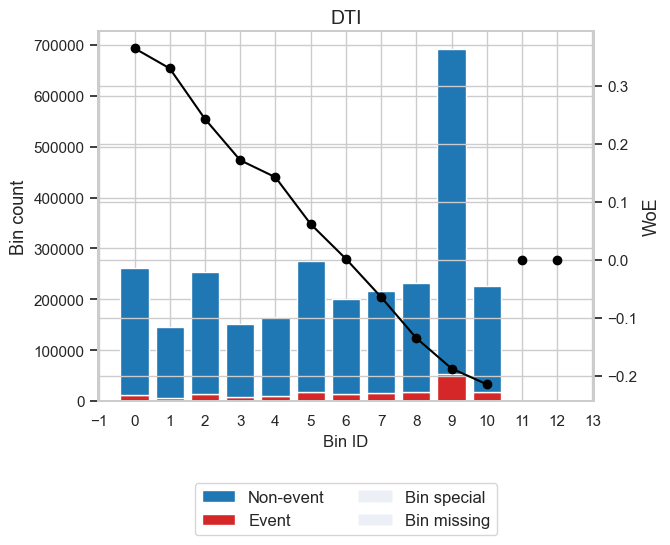


COLUMN: CSCORE_B
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 676.50)",188874,0.067036,151936,36938,0.195570,-1.238613,0.175232,2.060313e-02
1,"[676.50, 695.50)",156397,0.055509,135229,21168,0.135348,-0.798353,0.050118,6.103556e-03
2,"[695.50, 715.50)",228914,0.081248,204519,24395,0.106568,-0.526549,0.028357,3.504237e-03
3,"[715.50, 726.50)",151761,0.053864,138512,13249,0.087302,-0.305797,0.005756,7.167610e-04
4,"[726.50, 736.50)",150701,0.053488,139165,11536,0.076549,-0.162644,0.001519,1.896438e-04
5,"[736.50, 744.50)",141435,0.050199,132069,9366,0.066221,-0.006593,0.000002,2.735496e-07
6,"[744.50, 753.50)",175661,0.062347,165253,10408,0.059250,0.112071,0.000746,9.320037e-05
7,"[753.50, 760.50)",153978,0.054651,145940,8038,0.052202,0.246184,0.002979,3.714082e-04
8,"[760.50, 767.50)",161409,0.057288,153600,7809,0.048380,0.326243,0.005300,6.595552e-04
9,"[767.50, 774.50)",173463,0.061567,166032,7431,0.042839,0.453689,0.010438,1.293663e-03


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.37770317
    IV (Jeffrey)             0.46932423
    JS (Jensen-Shannon)      0.05643598
    Hellinger                0.05751847
    Triangular               0.21777660
    KS                       0.28660078
    HHI                      0.07024239
    HHI (normalized)         0.01213254
    Cramer's V               0.18594146
    Quality score            0.95575548

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic       p-value  P[A > B]     P[B > A]
        0      1  2216.735002  0.000000e+00  1.000000 0.000000e+00
        1      2   738.088120 1.561352e-162  1.000000 0.000000e+00
        2      3   380.163736  1.146340e-84  1.000000 0.000000e+00
        3      4   116.215149  4.264321e-27  1.000000 0.000000e+00
        4      5   117.147492  2.664941e-27

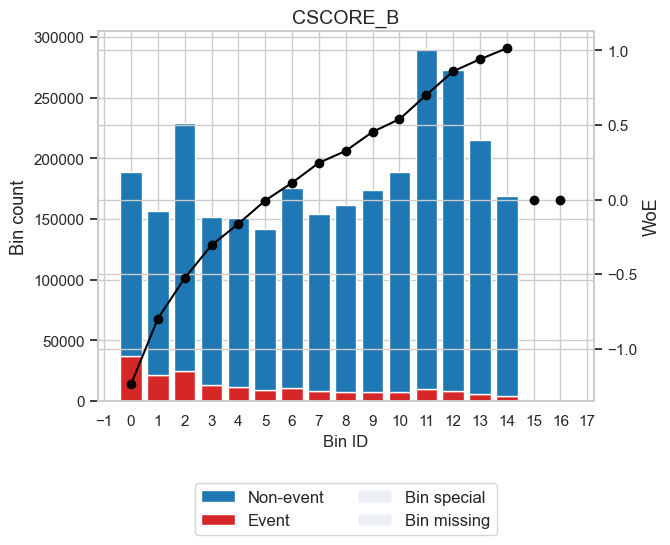


COLUMN: CSCORE_C
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 676.50)",181257,0.064333,147249,34008,0.187623,-1.187302,0.151327,0.017878
1,"[676.50, 694.50)",143128,0.050800,123681,19447,0.135871,-0.802819,0.046470,0.005658
2,"[694.50, 715.50)",236336,0.083882,211159,25177,0.106531,-0.526151,0.029227,0.003612
3,"[715.50, 726.50)",151758,0.053863,138619,13139,0.086579,-0.296687,0.005397,0.000672
4,"[726.50, 736.50)",150512,0.053421,138842,11670,0.077535,-0.176516,0.001798,0.000224
5,"[736.50, 750.50)",257785,0.091495,241190,16595,0.064375,0.023652,0.000051,0.000006
6,"[750.50, 758.50)",166729,0.059177,157460,9269,0.055593,0.179664,0.001768,0.000221
7,"[758.50, 767.50)",207908,0.073792,197581,10327,0.049671,0.298555,0.005785,0.000720
8,"[767.50, 774.50)",171552,0.060888,163868,7684,0.044791,0.407089,0.008476,0.001052
9,"[774.50, 785.50)",296284,0.105159,284463,11821,0.039898,0.527894,0.023400,0.002892


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.35482335
    IV (Jeffrey)             0.41300915
    JS (Jensen-Shannon)      0.04987849
    Hellinger                0.05072934
    Triangular               0.19320446
    KS                       0.26926101
    HHI                      0.07025107
    HHI (normalized)         0.01214177
    Cramer's V               0.17443320
    Quality score            0.68475857

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic       p-value  P[A > B]     P[B > A]
        0      1  1556.267135  0.000000e+00  1.000000 0.000000e+00
        1      2   739.545273 7.527605e-163  1.000000 0.000000e+00
        2      3   413.441733  6.530660e-92  1.000000 0.000000e+00
        3      4    82.027423  1.342115e-19  1.000000 0.000000e+00
        4      5   255.415480  1.713427e-57

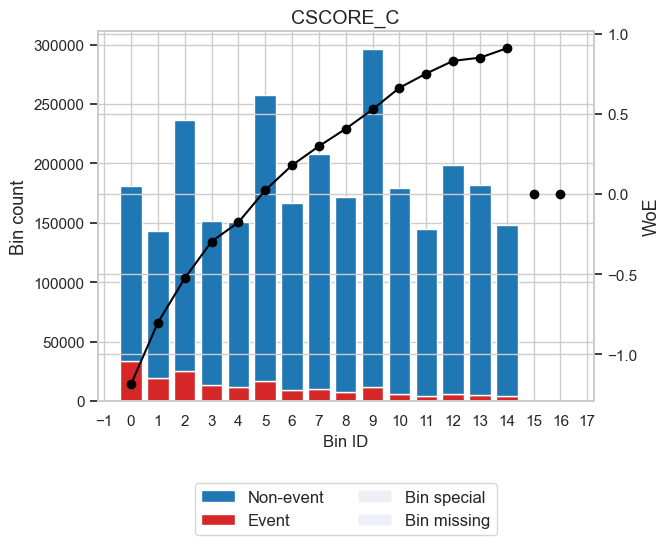


COLUMN: NUM_UNIT
OPTIMAL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",2817486,1.0,2632054,185432,0.065815,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,2817486,1.0,2632054,185432,0.065815,,0.0,0.0


---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.00000000
    IV (Jeffrey)             0.00000000
    JS (Jensen-Shannon)      0.00000000
    Hellinger                0.00000000
    Triangular               0.00000000
    KS                       0.00000000
    HHI                      1.00000000
    HHI (normalized)         1.00000000
    Cramer's V               0.00000000
    Quality score            0.00000000

  Monotonic trend             undefined

  Significance tests

    None

None


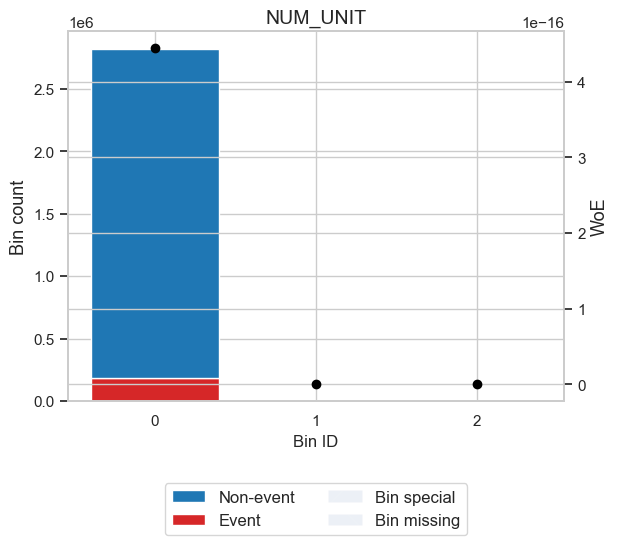

In [11]:

for col in NUMERICAL_COLUMNS:
    print("====================================================================================================")
    print("COLUMN:", col)
    print("====================================================================================================")
    optb = OptimalBinning(name=col, dtype="numerical", solver="cp")
    optb.fit(processed_df[col], processed_df["DLQ_FLAG"])
    print(optb.status)
    display(optb.binning_table.build())
    print(optb.binning_table.analysis())
    optb.binning_table.plot(metric="woe")
    opt_bin_data[col] = optb.transform(processed_df[col], metric="woe")
    print()

# Model fitting

In [12]:
opt_bin_data["ORIG_DTE_YR"] = pd.to_datetime(opt_bin_data["ORIG_DTE"]).dt.year - 2000
opt_bin_data["ORIG_DTE_MONTH"] = pd.to_datetime(opt_bin_data["ORIG_DTE"]).dt.month
opt_bin_data["FRST_DTE_YR"] = pd.to_datetime(opt_bin_data["FRST_DTE"]).dt.year - 2000
opt_bin_data["FRST_DTE_MONTH"] = pd.to_datetime(opt_bin_data["FRST_DTE"]).dt.month
opt_bin_data.drop(columns=["ORIG_DTE","FRST_DTE","AQSN_DTE"],inplace=True)

opt_bin_data

,LOAN_ID,ORIG_RATE,ORIG_AMOUNT,ORIG_TERM,PROP_VALUE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,...,Ongoing,Current_DLQ,LAST_STAT,COMPLETE_FLAG,NET_LOSS,NET_SEV,ORIG_DTE_YR,ORIG_DTE_MONTH,FRST_DTE_YR,FRST_DTE_MONTH
0,130357804,-0.264172,0.048219,-0.025185,354166.67,-0.124733,-0.165542,-0.187671,-0.526549,-0.526151,...,1,0,C,0.0,0.0,0.0,22,1,22,3
1,130357805,0.105471,-0.087339,-0.025185,898529.41,-0.298372,0.246302,-0.135124,-0.798353,0.407089,...,1,0,C,0.0,0.0,0.0,21,12,22,2
2,130357806,0.105471,-0.087339,-0.025185,995000.00,-0.146496,0.246302,-0.135124,0.700811,0.298555,...,1,0,C,0.0,0.0,0.0,21,12,22,2
3,130357807,-0.342042,0.017615,-0.025185,225263.16,0.050503,-0.165542,0.171993,0.859491,0.751994,...,1,0,C,0.0,0.0,0.0,21,4,22,1
4,130357808,0.105471,-0.001967,0.191238,225000.00,-0.298372,0.246302,-0.187671,0.326243,0.298555,...,1,0,C,0.0,0.0,0.0,21,12,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983187,137429687,-0.255249,-0.013674,-0.025185,518750.00,0.050503,0.246302,0.001741,0.112071,0.407089,...,1,0,C,0.0,0.0,0.0,23,11,24,1
2983188,137429688,0.504435,-0.001967,-0.025185,233823.53,-0.298372,-0.165542,0.171993,0.940564,0.850829,...,1,0,C,0.0,0.0,0.0,23,11,24,1
2983189,137429689,0.608038,-0.087339,-0.025185,1170967.74,-0.146496,-0.165542,-0.214901,0.859491,0.831031,...,1,0,C,0.0,0.0,0.0,23,10,23,12
2983190,137429690,0.608038,0.047845,-0.025185,340206.19,0.128123,0.246302,-0.187671,-0.305797,-0.176516,...,1,0,C,0.0,0.0,0.0,23,11,24,1


In [13]:
opt_bin_data.columns

Index(['LOAN_ID', 'ORIG_RATE', 'ORIG_AMOUNT', 'ORIG_TERM', 'PROP_VALUE',
       'OLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C', 'FTHB_FLAG', 'PURPOSE',
       'PROP_TYPE', 'NUM_UNIT', 'OCC_STAT', 'MI_TYPE', 'LAST_RATE', 'LAST_UPB',
       'LAST_ACTIVITY_DATE', 'DLQ_FLAG', 'Ongoing', 'Current_DLQ', 'LAST_STAT',
       'COMPLETE_FLAG', 'NET_LOSS', 'NET_SEV', 'ORIG_DTE_YR', 'ORIG_DTE_MONTH',
       'FRST_DTE_YR', 'FRST_DTE_MONTH'],
      dtype='object')

In [14]:
#verification of correctness

In [37]:
X, Y = opt_bin_data.drop(columns=["DLQ_FLAG", "LOAN_ID","LAST_ACTIVITY_DATE","LAST_STAT","ORIG_DTE_YR","ORIG_DTE_MONTH",'FRST_DTE_YR','FRST_DTE_MONTH','NET_LOSS','NET_SEV','MI_TYPE','PROP_TYPE','Ongoing', 'Current_DLQ','COMPLETE_FLAG']), opt_bin_data["DLQ_FLAG"]
#train_split = 0.00002
#X_train, X_test = X[:int(train_split*len(X))], X[int(train_split*len(X)):]
#Y_train, Y_test = Y[:int(train_split*len(X))], Y[int(train_split*len(X)):]

In [51]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size=0.99997, random_state=42)


In [52]:
X_train_1.shape

(84, 15)

## Fit SVM Median Model

In [ ]:
def RBF(X, gamma):
    
    # Free parameter gamma
    if gamma == None:
        gamma = 1.0/X.shape[1]
        
    # RBF kernel Equation
    K = np.exp(-gamma * np.sum((X - X[:,np.newaxis])**2, axis = -1))
    
    return K

In [53]:
import SVM_cluster
from importlib import reload  # Python 3.4+
#importlib.reload(mymodulesys.path.append('/Users/mengyanzhu/Documents/GitHub/msf-capstone-crm/SVM_optimizer')
reload(SVM_cluster)
from SVM_cluster import Median_SVM_Model
import gurobipy as gp
from gurobipy import GRB
from matplotlib.lines import Line2D
from matplotlib import cm
import numpy as np


#reload(Median_SVM_Model)


In [55]:
#def Median_SVM_Model(X, y):
    
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.4, random_state=42)
print(y_train.value_counts())
print(y_test.value_counts())
scaler = StandardScaler()    
# Fit scaler on the training data only
X_train = scaler.fit_transform(X_train)
#X_train = RBF(X_train, gamma=None)

# Apply the same scaler to the test data
X_test = scaler.transform(X_test)


smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)


X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

n_samples, n_features = X_train_smote.shape
#n_samples = len(X_train_smote)



# Create a new Gurobi model
model = gp.Model("SVM_Med")

# Set a time limit in seconds
time_limit = 1800  # 10 minutes
model.setParam(GRB.Param.TimeLimit, time_limit)
#model.setParam('MIPGap', 0.15)

# Optionally, enable verbose logging
model.setParam(GRB.Param.LogToConsole, 1)




# Regularization parameter
# Define the powers of 10 for C1, C2, C3
powers_C1 = [10**i for i in range(-1, 0)]  # 10^-5 to 10^5
powers_C2 = [10**i for i in range(-1, 0)]  # 10^-5 to 10^5
powers_C3 = [10**i for i in range(-1, 0)]  # 10^-3 to 10^0

# Number of options for C1, C2, and C3
num_C1 = len(powers_C1)
num_C2 = len(powers_C2)
num_C3 = len(powers_C3)

# Create binary decision variables for C1, C2, C3
C1_binary = model.addVars(num_C1, vtype=GRB.BINARY, name="C1_binary")
C2_binary = model.addVars(num_C2, vtype=GRB.BINARY, name="C2_binary")
C3_binary = model.addVars(num_C3, vtype=GRB.BINARY, name="C3_binary")

# Define auxiliary variables for the actual C1, C2, C3 values
C1 = model.addVar(name="C1")
C2 = model.addVar(name="C2")
C3 = model.addVar(name="C3")


# Link binary variables to C1, C2, C3 correctly
model.addConstr(
C1 == gp.quicksum(C1_binary[j] * powers_C1[j] for j in range(num_C1)), 
name="C1_constraint"
)
model.addConstr(
C2 == gp.quicksum(C2_binary[j] * powers_C2[j] for j in range(num_C2)), 
name="C2_constraint"
)
model.addConstr(
C3 == gp.quicksum(C3_binary[j] * powers_C3[j] for j in range(num_C3)), 
name="C3_constraint"
)


# Ensure only one binary variable is selected for each C
model.addConstr(gp.quicksum(C1_binary) == 1, "C1_selection")
model.addConstr(gp.quicksum(C2_binary) == 1, "C2_selection")
model.addConstr(gp.quicksum(C3_binary) == 1, "C3_selection")





# Add variables for w (decision boundary), b (bias), and xi (slack variables)
w = model.addVars(n_samples, lb=-GRB.INFINITY, name="w")
b = model.addVar(lb=-GRB.INFINITY, name="b")
ei = model.addVars(n_samples,lb=0, name="ei")  # slack variables
theta_i = model.addVars(n_samples,vtype=GRB.BINARY, name="theta_i")
xi = model.addVars(n_samples, vtype=GRB.BINARY,lb=0, name="xi")  # relabelled obeservations
di = model.addVars(n_samples, lb=0, name="di")  # distance from observations to their reference points
M1 = model.addVar(lb=0, name="M1")
M2 = model.addVar(lb=0, name="M2")
M3 = model.addVar(lb=0, name="M3")

K_plus = model.addMVar(n_samples, name="K_plus")
K_minus = model.addMVar(n_samples, name="K_minus")

# Introduce auxiliary variables to hold absolute differences for L1 norms
abs_diffs_plus = model.addVars(n_samples, n_features, name="abs_diffs_plus")
abs_diffs_minus = model.addVars(n_samples,  n_features, name="abs_diffs_minus")


# Loop to define absolute differences for K^+ (L1 norm)
for i in range(n_samples):
    for j in range(n_features):
        model.addConstr(abs_diffs_plus[i,j] >= X_train_smote[i, j] - K_plus[j], name=f"abs_diff_plus_pos_{i}_{j}")
        model.addConstr(abs_diffs_plus[i,j] >= -(X_train_smote[i, j] - K_plus[j]), name=f"abs_diff_plus_neg_{i}_{j}")


# Loop to define absolute differences for K^- (L1 norm)
for i in range(n_samples):
    for j in range(n_features):
        model.addConstr(abs_diffs_minus[i, j] >= X_train_smote[i, j] - K_minus[j], name=f"abs_diff_minus_pos_{i}_{j}")
        model.addConstr(abs_diffs_minus[i, j] >= -(X_train_smote[i, j] - K_minus[j]), name=f"abs_diff_minus_neg_{i}_{j}")


# Objective: 0.5 * ||w|| + C * sum(xi)


w_abs = model.addVars(n_samples,lb=0, name="w_abs")  # Auxiliary variable for |x|

# Add constraints for the absolute value
for i in range(n_samples):
    model.addConstr( w_abs[i] >= w[i], "abs_x_positive")
    model.addConstr( w_abs[i] >= -w[i], "abs_x_negative")

model.setObjective(
    0.5 * gp.quicksum( w_abs[i] for i in range(n_samples)) + C1 * sum(ei[i] for i in range(n_samples))
                                                                + C2 * sum(xi[i] for i in range(n_samples))
                                                                    + C3 * sum(di[i] for i in range(n_samples)),
    GRB.MINIMIZE
)

'''model.setObjective(
    0.5 * gp.quicksum( w_abs[i] for i in range(n_samples)) + C1 * sum(ei[i] for i in range(n_samples))
                                                                + C2 * sum(xi[i] for i in range(n_samples))
                                                                    + C3 * sum(di[i] for i in range(n_samples)),
    GRB.MINIMIZE
)'''

###set up Constraint for M3



# Loop over each point to calculate the max norm part
max_norms = []
max_norms_2 = []


for i in range(n_samples):
    # Calculate the sum term: sum_{j=1}^{d} (x[i][j] + 2)
    sum_term = gp.quicksum(X_train_smote[i, j] + 2 for j in range(n_features))
    
    # Create auxiliary variable for the maximum L1 norm for each point i
    max_norm_i = model.addVar(name=f"max_norm_i_{i}")
    max_norm_i_2 = model.addVar(name=f"max_norm_i_2_{i}")
    
    for j in range(n_samples):
        if i != j:  # Avoid self-comparison
            # Define the L1 norm (Manhattan distance) between points i and j
            l1_norm_expr = gp.quicksum(model.addVar(lb=0, name=f"abs_diff_M3{i}_{j}_{k}") for k in range(n_features))
            
            # Add constraints for each absolute value
            for k in range(n_features):
                abs_diff_M3 = model.addVar(lb=0, name=f"abs_diff_M3_{i}_{j}_{k}")
                model.addConstr(abs_diff_M3 >= X_train_smote[i, k] - X_train_smote[j, k], name=f"abs_diff_pos_M3{i}_{j}_{k}")
                model.addConstr(abs_diff_M3 >= X_train_smote[j, k] - X_train_smote[i, k], name=f"abs_diff_neg_M3{i}_{j}_{k}")

                # Add each absolute difference to the L1 norm expression
                l1_norm_expr += abs_diff_M3
                
            # Add constraint to ensure max_norm_i captures the maximum norm
            model.addConstr(max_norm_i >= l1_norm_expr, name=f"max_norm_constraint_M3{i}_{j}")
            # Define the L2 norm expression (squared L2 norm, no square root)
            l2_norm_expr = gp.quicksum((X_train_smote[i, k] - X_train_smote[j, k])**2 for k in range(n_features))
            
            # Add constraint to ensure max_norm_i captures the maximum L2 norm
            model.addConstr(max_norm_i_2 >= l2_norm_expr, name=f"max_norm_constraint_L2_{i}_{j}")

    # Append max_norm_i to max_norms list to calculate the maximum later
    max_norms.append(max_norm_i)
    max_norms_2.append(max_norm_i_2)


# Now find the maximum of the max_norms
max_of_max_norms = model.addVar(name="max_of_max_norms")  # Variable to hold the maximum of the max norms

# Add constraints to find the maximum
for idx, max_norm_2 in enumerate(max_norms_2):
    model.addConstr(max_of_max_norms >= max_norm_2, name=f"max_constraint_{idx}")


# Loop over each point
for i in range(n_samples):
    # Create an auxiliary variable for the maximum norm
    max_norm_expr = model.addVar(name=f"max_norm_i_{i}")  # Auxiliary variable for M2 constraint
    
    for j in range(n_samples):
        if i != j:  # Avoid self-comparison
            # Define the L1 norm (Manhattan distance) as the sum of absolute differences
            
            norm_expr = gp.LinExpr()

            # Add constraints for each absolute value
            for k in range(n_features):
                abs_diff_M2 = model.addVar(lb=0, name=f"abs_diff_M2_{i}_{j}_{k}")
                model.addConstr(abs_diff_M2 >= X_train_smote[i, k] - X_train_smote[j, k], name=f"abs_diff_pos_M2{i}_{j}_{k}")
                model.addConstr(abs_diff_M2 >= X_train_smote[j, k] - X_train_smote[i, k], name=f"abs_diff_neg_M2{i}_{j}_{k}")
                # Add each absolute difference to the L1 norm expression
                norm_expr += abs_diff_M2
                
            # Add the constraint for max norm
            model.addConstr(max_norm_expr >= norm_expr, name=f"max_norm_constraint_M2{i}_{j}")




# Constraints: y_i * (w * x_i + b) >= 1 - xi_i
for i in range(n_samples):
    model.addConstr(
        y_train_smote[i] * (gp.quicksum(w[j] * X_train_smote[i, j] for j in range(n_features)) + b) >= -M1* xi[i],
        name=f"margin_constraint_{i}"

    )
    L1_norm_plus = gp.quicksum(abs_diffs_plus[i, j] for j in range(n_features))  # Calculate the L1 norm for K^+
    model.addConstr(di[i] >= L1_norm_plus - M2 * (1 - theta_i[i]), name=f"d_constraint_plus_{i}")
    
    L1_norm_minus = gp.quicksum(abs_diffs_minus[i, j] for j in range(n_features))  # Calculate the L1 norm for K^-
    model.addConstr(di[i] >= L1_norm_minus - M2 * theta_i[i], name=f"d_constraint_minus_{i}")




    model.addConstr(
        gp.quicksum(w[j] * X_train_smote[i, j] for j in range(n_features)) + b >= 1-ei[i]-M3* (1-theta_i[i]),
        name = f"cluster_+_{i}"
    )
    model.addConstr(
        gp.quicksum(w[j] * X_train_smote[i, j] for j in range(n_features)) + b <= -1+ei[i]+M3* theta_i[i],
        name = f"cluster_+_{i}"
    )


    model.addConstr(M1 >= y_train_smote[i] * (gp.quicksum(X_train_smote[i, j] for j in range(n_features)) + 1),name="M1_constraint" ) #add M1 Constraint
    
###Add Constraint for M1, M2, M3

# Add the constraint: M3 > sum_{j=1}^d x_{ij} + 2 + max{ ||x_i - x_j||_2 }
model.addConstr(M3 >= sum_term + max_of_max_norms + 10e-13, name=f"M3_constraint_{i}")
        

# Add the constraint M2
model.addConstr(M2 >= max_norm_expr, name="M2_constraint")

# Add the constraint: M1 > max{ y_i * (sum_{j=1}^d x_{ij} + 1) }

# model.addConstr(M1>= gp.quicksum(y_train_smote[i] * (gp.quicksum(X_train_smote[i, j] for j in range(n_features)) + 1) for i in range(n_samples))+ 10e-6) #add M1 Constraint
    



# Solve the model
model.optimize()


# Check the optimization result
if model.status == GRB.OPTIMAL: 
    w_values = [w[j].x for j in range(n_features)]
    b_value = b.x
    print("C1:", C1.X, "C2:", C2.X, "C3:", C3.X)
    print("M1:", M1.X, "M2:", M2.X, "M3:", M3.X)
    print("Optimal weights (w):", w_values)
    print("Optimal bias (b):", b_value)
    


    # Make predictions on the test set
    predictions = []
    for i in range(len(X_test)):
        prediction = sum(w_values[j] * X_test[i, j] for j in range(n_features)) + b_value
        threshold = -0.1
        predictions.append(1 if prediction >= threshold else 0)  # Classify as 1 or 0

    # Evaluate model performance
    #auc_score = auc(y_test, predictions)
    roc_score = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='binary')
    recall = recall_score(y_test, predictions, average='binary')
    
    
    # Print evaluation results

    print("Test Evaluation:")
    print(f"ROC Score: {roc_score:.4f}")
    print(classification_report(y_test,predictions))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    
    train_predictions = [1 if sum(w_values[j] * X_train[i, j] for j in range(n_features)) + b_value >= threshold else 0 for i in range(len(X_train))]
    train_accuracy = sum(y_train[i] == train_predictions[i] for i in range(len(y_train))) / len(y_train)
    
    print("Training Accuracy:", train_accuracy)


    
    


    # Step 1: Apply PCA to reduce to 2D
    pca = PCA(n_components=2)  # 2D for visualization
    
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)  # Apply the same PCA transformation to test data

    # Step 2: Assuming you have the weights and bias from the trained model
    
    # Here, we simulate the decision boundary for illustration
    weights_reduced = pca.transform([w_values])[0]
    # Decision boundary (hyperplane) equation in reduced space
    x1_values = np.linspace(X_train_reduced[:, 0].min(), X_train_reduced[:, 0].max(), 100)
    x2_values = -( weights_reduced[0] * x1_values + b_value) /  weights_reduced[1]  # SVM equation for decision boundary

    # Step 3: Plot
    plt.figure(figsize=(8, 6))

    # Plot training data
    train_scatter = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='coolwarm', alpha=0.7, label='Train Data')

    # Plot test data
    test_scatter = plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, cmap='coolwarm', alpha=0.7, marker='x', label='Test Data')


    # Plot the decision boundary
    plt.plot(x1_values, x2_values, color='black', linestyle='--', label='Decision Boundary')

    # Add labels and legend
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('SVM Decision Boundary with Train and Test Data')
    train_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Train Data')
    test_patch = Line2D([0], [0], marker='x', color='gray', markersize=10, label='Test Data')
    class_0_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0')
    class_1_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')
    # Add legend manually
    plt.legend(handles=[train_patch, test_patch, class_0_patch, class_1_patch], loc='best')
    plt.grid(True)
    plt.show()


    
elif model.status == GRB.TIME_LIMIT:
    print("Time limit reached. Best solution found so far.")
    print("C1:", C1.X, "C2:", C2.X, "C3:", C3.X)
    print("M1:", M1.X, "M2:", M2.X, "M3:", M3.X)
    w_values = [w[j].x for j in range(n_features)]
    b_value = b.x
    print("Optimal weights (w):", w_values)
    print("Optimal bias (b):", b_value)

    # Make predictions on the test set
    predictions = []
    for i in range(len(X_test)):
        prediction = sum(w_values[j] * X_test[i, j] for j in range(n_features)) + b_value
        threshold = -0.1  # Experiment with this value
        predictions.append(1 if prediction >= threshold else 0)  # Classify as 1 or -1


    train_predictions = [1 if sum(w_values[j] * X_train[i, j] for j in range(n_features)) + b_value >= threshold else 0 for i in range(len(X_train))]
    train_accuracy = sum(y_train[i] == train_predictions[i] for i in range(len(y_train))) / len(y_train)
    
    print("Training Accuracy:", train_accuracy)
    # Evaluate model performance
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='binary')
    recall = recall_score(y_test, predictions, average='binary')
    
    

    # Print evaluation results
    print("Test Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    
    print(classification_report(y_test, predictions))


    # Step 1: Apply PCA to reduce to 2D
    pca = PCA(n_components=2)  # 2D for visualization
    
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)  # Apply the same PCA transformation to test data
    weights_reduced = pca.transform([w_values])[0]
    # Step 2: Assuming you have the weights and bias from the trained model
    
    # Decision boundary (hyperplane) equation in reduced space
    x1_values = np.linspace(X_train_reduced[:, 0].min(), X_train_reduced[:, 0].max(), 100)
    x2_values = -( weights_reduced[0] * x1_values + b_value) /  weights_reduced[1]  # SVM equation for decision boundary

    # Step 3: Plot
    plt.figure(figsize=(8, 6))

    # Plot training data
    train_scatter = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='coolwarm', alpha=0.7, label='Train Data')

    # Plot test data
    test_scatter = plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, cmap='coolwarm', alpha=0.7, marker='x', label='Test Data')


    # Plot the decision boundary
    plt.plot(x1_values, x2_values, color='black', linestyle='--', label='Decision Boundary')

    # Add labels and legend
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('SVM Decision Boundary with Train and Test Data')
    
    train_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Train Data')
    test_patch = Line2D([0], [0], marker='x', color='gray', markersize=10, label='Test Data')
    class_0_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0')
    class_1_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')
    # Add legend manually
    plt.legend(handles=[train_patch, test_patch, class_0_patch, class_1_patch], loc='best')
    plt.grid(True)
    plt.show()
    
else:
    print("No optimal solution found.")
    


DLQ_FLAG
0    45
1     5
Name: count, dtype: int64
DLQ_FLAG
0    32
1     2
Name: count, dtype: int64
Set parameter TimeLimit to value 1800


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/3211976660.py:77: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  model.addConstr(gp.quicksum(C1_binary) == 1, "C1_selection")
/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/3211976660.py:78: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  model.addConstr(gp.quicksum(C2_binary) == 1, "C2_selection")
/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/3211976660.py:79: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  model.addConstr(gp.quicksum(C3_binary) == 1, "C3_selection")


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 510398 rows, 364151 columns and 876523 nonzeros
Model fingerprint: 0x42e20207
Model has 270 quadratic objective terms
Model has 450 quadratic constraints
Variable types: 363968 continuous, 183 integer (183 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [6e-03, 5e+00]
  Objective range  [5e-01, 5e-01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-05, 7e+01]
  QRHS range       [1e+00, 1e+00]
Presolve removed 506462 rows and 360924 columns
Presolve time: 0.05s
Presolved: 4791 rows, 3902 columns, 16017 nonzeros
Presolved model has 450 SOS constraint(s)
Variable types: 3362 continuous, 540 integer (360 binary)
Found heuristic solution: objective 98.3118173

Root relaxati

KeyError: 0

In [ ]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_train)


#Median_SVM_Model(X_train, Y_train)

DLQ_FLAG
0    26
1     5
Name: count, dtype: int64
DLQ_FLAG
0    20
1     2
Name: count, dtype: int64
Set parameter TimeLimit to value 1800


/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/356671344.py:77: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  model.addConstr(gp.quicksum(C1_binary) == 1, "C1_selection")
/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/356671344.py:78: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  model.addConstr(gp.quicksum(C2_binary) == 1, "C2_selection")
/var/folders/xk/cmg2qxpd3_33lsrdb28qrgpr0000gn/T/ipykernel_71088/356671344.py:79: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  model.addConstr(gp.quicksum(C3_binary) == 1, "C3_selection")


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 167760 rows, 121439 columns and 210837 nonzeros
Model fingerprint: 0xb1e1ab73
Model has 156 quadratic objective terms
Model has 260 quadratic constraints
Variable types: 121324 continuous, 115 integer (115 binary)
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [3e-03, 5e+00]
  Objective range  [5e-01, 5e-01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-05, 9e+01]
  QRHS range       [1e+00, 1e+00]
Presolve removed 165516 rows and 119547 columns
Presolve time: 0.03s
Presolved: 2973 rows, 2414 columns, 9728 nonzeros
Presolved model has 260 SOS constraint(s)
Presolved model has 104 bilinear constraint(s)
         in product terms.
         Presolve was not able to compute smal